In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
pd.options.mode.chained_assignment = None 

# Data Cleaning, Wrangling, and Augmentation

In [ ]:
speed = pd.read_csv("https://raw.githubusercontent.com/jlo-berkeley/142project/main/SpeedDating.csv")
speed.head()

# General notes on column notation from source:
# All partner (denoted by PID) values are suffixed with _o.
# pf_o_attribute is the partner's (PID) value for attribute1_1

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Import college ranking table, then merge onto speed dataset.

college_rankings = pd.read_csv('https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/cwurData.csv')
college_rankings = college_rankings.head(1200)
college_rankings = college_rankings.filter(['world_rank', 'institution'])
college_rankings['institution'] = college_rankings['institution'].str.lower()
speed['undergra'] = speed['undergra'].str.lower()
NaN_ranking = {'world_rank': 500, 'institution': np.nan}
college_rankings = college_rankings.append(NaN_ranking, ignore_index= True)
college_rankings = college_rankings.rename({'institution': 'undergra'}, axis=1)
speed = pd.merge(speed, college_rankings, how = "left", on='undergra')
speed['world_rank'] = speed['world_rank'].fillna(1001)
speed.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,world_rank
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,500.0
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,500.0
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,500.0
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,500.0
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,500.0


In [ ]:
# Replace nan values with string 'n/a' for regex processing.

field_col = speed['field'].fillna('n/a')

# Find all master student entries with regex.
# Replace values with 1 if master's student or above, else 0.

find_masters = [re.findall(r'(M[BIF\.]?A\.?)|((Ed)|(Ph)|J)\.?D\.?|([Mm]asters?)|GSAS', i) for i in field_col]
replace_masters = [0 if i == [] else 1 for i in find_masters]

In [ ]:
# Add masters column to original table

speed['masters'] = replace_masters
speed[['field', 'masters']].groupby('field').first().query('masters == 1').head()

,masters
field,
American Studies (Masters),1
Biology PhD,1
Business (MBA),1
Business and International Affairs (MBA/MIA Dual Degree),1
Business- MBA,1


In [ ]:
# Convert strings to floats where needed.

speed['income'] = speed['income'].str.replace(",", "")
speed['income'] = pd.to_numeric(speed[['income']].income, errors='coerce')
speed['mn_sat'] = speed['mn_sat'].str.replace(",", "")
speed['mn_sat'] = pd.to_numeric(speed[['mn_sat']].mn_sat, errors='coerce')
speed['tuition'] = speed['tuition'].str.replace(",", "")
speed['tuition'] = pd.to_numeric(speed[['tuition']].tuition, errors='coerce')

# Compute mean/median values, then use them to fill NaNs.

mean_sat = np.mean(speed['mn_sat'].dropna().values).round(2)
mean_tuition = np.mean(speed['tuition'].dropna().values).round(2)
med_income = np.median(speed['income'].dropna().values).round(2)
med_match_es = np.median(speed['match_es'].dropna().values).round(2)
speed = speed.fillna(value={'mn_sat': mean_sat, 'tuition': mean_tuition, 'income': med_income, 'match_es': med_match_es})

In [ ]:
# These values are surveyed /after/ the speed dating occurs. These are not of interest
# to our particular points of exploration outlined in the report, so we will drop them.
speed = speed.drop(columns=["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"])
speed = speed.drop(columns=["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"])
speed = speed.drop(columns=["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"])
speed = speed.drop(columns=["attr2_3", "sinc2_3", "intel2_3", "fun2_3", "amb2_3", "shar2_3"])
speed = speed.drop(columns=["attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"])
speed = speed.drop(columns=["attr5_3", "sinc5_3", "intel5_3", "fun5_3", "amb5_3"])
speed = speed.drop(columns=["attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2"])
speed = speed.drop(columns=["attr7_2", "sinc7_2", "intel7_2", "fun7_2", "amb7_2", "shar7_2"])
speed = speed.drop(columns=["attr4_2", "sinc4_2", "intel4_2", "fun4_2", "amb4_2", "shar4_2"])
speed = speed.drop(columns=["attr2_2", "sinc2_2", "intel2_2", "fun2_2", "amb2_2", "shar2_2"])
speed = speed.drop(columns=["attr3_2", "sinc3_2", "intel3_2", "fun3_2", "amb3_2"])
speed = speed.drop(columns=["attr5_2", "sinc5_2", "intel5_2", "fun5_2", "amb5_2"])
speed = speed.drop(columns=["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"])
speed = speed.drop(columns=["attr3_s", "sinc3_s", "intel3_s", "fun3_s", "amb3_s"])
speed = speed.drop(columns=["num_in_3", "numdat_3", "expnum", "date_3", "them_cal", "you_call", "numdat_2"])

# There are two rows for every paid, such that each individual from each pair appears as both
# the PID and IID once for each match up. As such, we can safely remove these attr, sinc... etc.,
# as they will appear as attr_o, sinc_o... etc. in another row.
speed = speed.drop(columns=["attr", "sinc", "intel", "fun", "amb", "shar", "like", "prob", "like_o", "prob_o", "satis_2"])

# Drop values not used in analysis due to encoding from other variables (e.g. mn_sat).
speed = speed.drop(columns=["positin1", "zipcode", "length", "undergra"])

In [ ]:
# Check to see if there are any remaining columns with too many null values to fill.

k = speed.isnull().sum(axis = 0).sort_values(ascending=False)
print("Number of Null Values per Column")
for i in range(len(k)):
  if k.values[i] > 200:
    print(k.index[i], k.values[i])
speed[['attr5_1']].value_counts()
speed.shape
# Drop corresponding columns.

speed = speed.drop(columns=["attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"])
speed = speed.drop(columns=["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"])

Number of Null Values per Column
amb5_1 3472
fun5_1 3472
intel5_1 3472
sinc5_1 3472
attr5_1 3472
shar4_1 1911
sinc4_1 1889
attr4_1 1889
intel4_1 1889
fun4_1 1889
amb4_1 1889
shar_o 1189
amb_o 821
met_o 434
met 409
fun_o 402
intel_o 344
sinc_o 331
attr_o 244


In [ ]:
# Check final NaN counts. 
# Note: We can run 6 different regressions for attribute_o, and remove NaN as needed.
# The reason for NaNs is as given:
# "If you haven‟t formed an opinion based on your conversation, fill in N/A, but please fill in all boxes."

k = speed.isnull().sum(axis = 0).sort_values(ascending=False)
print("Number of Null Values per Column")
for i in range(len(k)):
  if k.values[i] > 100:
    print(k.index[i], k.values[i])

Number of Null Values per Column
shar_o 1189
amb_o 821
met_o 434
met 409
fun_o 402
intel_o 344
sinc_o 331
attr_o 244
int_corr 170
pf_o_sha 147
career_c 138
age_o 122
shar1_1 121
pf_o_amb 119
pf_o_fun 110
fun3_1 105
amb3_1 105
intel3_1 105
sinc3_1 105
attr3_1 105
exphappy 101
pf_o_sin 101
pf_o_int 101
pf_o_att 101


In [ ]:
speed.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,met_o,age,field,field_cd,mn_sat,tuition,race,imprace,imprelig,from,income,...,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,met,match_es,world_rank,masters
0,1,1.0,0,1,1,1,10,7,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,2.0,21.0,Law,1.0,1315.39,22096.85,4.0,2.0,4.0,Chicago,69487.0,...,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,2.0,4.0,500.0,0
1,1,1.0,0,1,1,1,10,7,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,2.0,21.0,Law,1.0,1315.39,22096.85,4.0,2.0,4.0,Chicago,69487.0,...,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,1.0,4.0,500.0,0
2,1,1.0,0,1,1,1,10,7,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,1315.39,22096.85,4.0,2.0,4.0,Chicago,69487.0,...,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,1.0,4.0,500.0,0
3,1,1.0,0,1,1,1,10,7,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,2.0,21.0,Law,1.0,1315.39,22096.85,4.0,2.0,4.0,Chicago,69487.0,...,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,2.0,4.0,500.0,0
4,1,1.0,0,1,1,1,10,7,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,2.0,21.0,Law,1.0,1315.39,22096.85,4.0,2.0,4.0,Chicago,69487.0,...,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,2.0,4.0,500.0,0


In [ ]:
# Sanity check on columns in speed.

display(np.array(speed.columns))

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'order', 'partner', 'pid', 'match', 'int_corr',
       'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int',
       'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o',
       'intel_o', 'fun_o', 'amb_o', 'shar_o', 'met_o', 'age', 'field',
       'field_cd', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig',
       'from', 'income', 'goal', 'date', 'go_out', 'career', 'career_c',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
       'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'dec', 'met',
       'match_es', 'world_rank', 'masters'], dtype=object)

In [ ]:
# Drop rows where we cannot observe the partner.

speed = speed[speed['pid'].notna()]

# Create IID lookup dataframe.

iid = speed.groupby('iid').first()[["gender", "age", "field", "field_cd", "mn_sat", 
       "tuition", 'race', 'imprace', 'imprelig',
       'from', 'income', 'goal', 'date', 'go_out', 'career', 'career_c',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
       'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'world_rank', 'masters']]
iid.head(10)

# Rename columns for joining speed with partner info.

pid = iid.copy().drop(columns=["gender", "age", "field", "race", "career", 'attr1_1', 'sinc1_1', 
  'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']).rename(columns={'field_cd':'field_cd_o', 
  'mn_sat':'mn_sat_o', 'tuition':'tuition_o', 'world_rank': 'world_rank_o', 'masters': 'masters_o',
  'imprace':'imprace_o', 'imprelig':'imprelig_o', 'from':'from_o', 'income':'income_o', 
  'goal':'goal_o', 'date':'date_o', 'go_out':'go_out_o', 'exphappy':'exphappy_o', 
  'career_c':'career_c_o', 'sports':'sports_o', 'tvsports':'tvsport_o', 'exercise':'exercise_o', 
  'dining':'dining_o', 'museums':'museums_o', 'art':'art_o', 'hiking':'hiking_o', 'gaming':'gaming_o', 
  'clubbing':'clubbing_o', 'reading':'reading_o', 'tv':'tv_o', 'theater':'theater_o',
  'movies':'movies_o', 'concerts':'concerts_o', 'music':'music_o', 'shopping':'shopping_o', 'yoga':'yoga_o',
  'attr3_1':'attr3_1_o', 'sinc3_1':'sinc3_1_o', 'fun3_1':'fun3_1_o', 'intel3_1':'intel3_1_o', 'amb3_1':'amb3_1_o',
  'attr2_1':'attr2_1_o', 'sinc2_1':'sinc2_1_o', 'intel2_1':'intel2_1_o', 'fun2_1':'fun2_1_o', 'amb2_1':'amb2_1_o', 'shar2_1':'shar2_1_o'})

# Merge partner info with speed info into DataFrame merged.

merged = pd.merge(left=speed, right=pid, how="inner", left_on="pid", right_index=True)
merged.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,met_o,age,field,field_cd,mn_sat,tuition,race,imprace,imprelig,from,income,...,tuition_o,imprace_o,imprelig_o,from_o,income_o,goal_o,date_o,go_out_o,career_c_o,sports_o,tvsport_o,exercise_o,dining_o,museums_o,art_o,hiking_o,gaming_o,clubbing_o,reading_o,tv_o,theater_o,movies_o,concerts_o,music_o,shopping_o,yoga_o,exphappy_o,attr2_1_o,sinc2_1_o,intel2_1_o,fun2_1_o,amb2_1_o,shar2_1_o,attr3_1_o,sinc3_1_o,fun3_1_o,intel3_1_o,amb3_1_o,world_rank_o,masters_o
0,1,1.0,0,1,1,1,10,7,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,2.0,21.0,Law,1.0,1315.39,22096.85,4.0,2.0,4.0,Chicago,69487.0,...,22096.85,7.0,3.0,Argentina,43367.0,1.0,5.0,4.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,7.0,25.0,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0,500.0,0
10,2,2.0,0,3,1,1,10,3,10,1,11.0,0,0.29,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,2.0,24.0,law,1.0,1315.39,22096.85,2.0,2.0,5.0,Alabama,65929.0,...,22096.85,7.0,3.0,Argentina,43367.0,1.0,5.0,4.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,7.0,25.0,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0,500.0,0
20,3,3.0,0,5,1,1,10,9,6,1,11.0,0,-0.24,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,7.0,8.0,6.0,5.0,8.0,4.0,1.0,25.0,Economics,2.0,1315.39,22096.85,2.0,8.0,4.0,Connecticut,43367.0,...,22096.85,7.0,3.0,Argentina,43367.0,1.0,5.0,4.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,7.0,25.0,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0,500.0,0
30,4,4.0,0,7,1,1,10,6,3,1,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,7.0,5.0,2.0,23.0,Law,1.0,1315.39,22096.85,2.0,1.0,1.0,Texas,37754.0,...,22096.85,7.0,3.0,Argentina,43367.0,1.0,5.0,4.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,7.0,25.0,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0,500.0,0
40,5,5.0,0,9,1,1,10,4,1,1,11.0,0,-0.43,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,7.0,6.0,2.0,21.0,Law,1.0,1315.39,22096.85,2.0,8.0,1.0,Bowdoin College,86340.0,...,22096.85,7.0,3.0,Argentina,43367.0,1.0,5.0,4.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,7.0,25.0,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0,500.0,0


In [ ]:
# Sanity check on columns in merged.

display(np.array(merged.columns))

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'order', 'partner', 'pid', 'match', 'int_corr',
       'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int',
       'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o',
       'intel_o', 'fun_o', 'amb_o', 'shar_o', 'met_o', 'age', 'field',
       'field_cd', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig',
       'from', 'income', 'goal', 'date', 'go_out', 'career', 'career_c',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
       'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'dec', 'met',
       'match_es', 'world_rank', 'masters', 'field_cd_o', 'mn_sat_o',
       'tuiti

In [ ]:
# Compute the absolute difference between responses for age/age_o, income/income_o, date/date_o, 
# go_out/go_out_o, sports/sports_o...yoga/yoga_o, and pf_o_attribute/attribute3_1 (not including shar), and 
# attribute1_1/attribute3_1_o (not including shar), and attribute2_1_o/attribute1_1 and
# attribute2_1/pf_o_attribute.

# These values will be used in place of absolute values, because we want to
# look at pairwise information for matching.

# Save all of these as new columns in merged.

merged['age_abs(diff)'] = abs(merged['age'] - merged['age_o'])
merged['income_abs(diff)'] = abs(merged['income'] - merged['income_o'])
merged['date_abs(diff)'] = abs(merged['date'] - merged['date_o'])
merged['go_out_abs(diff)'] = abs(merged['go_out'] - merged['go_out_o'])
merged['sports_abs(diff)'] = abs(merged['sports'] - merged['sports_o'])
merged['tvsport_abs(diff)'] = abs(merged['tvsports'] - merged['tvsport_o'])
merged['exercise_abs(diff)'] = abs(merged['exercise'] - merged['exercise_o'])
merged['dining_abs(diff)'] = abs(merged['dining'] - merged['dining_o'])
merged['museums_abs(diff)'] = abs(merged['museums'] - merged['museums_o'])
merged['art_abs(diff)'] = abs(merged['art'] - merged['art_o'])
merged['hiking_abs(diff)'] = abs(merged['hiking'] - merged['hiking_o'])
merged['gaming_abs(diff)'] = abs(merged['gaming'] - merged['gaming_o'])
merged['clubbing_abs(diff)'] = abs(merged['clubbing'] - merged['clubbing_o'])
merged['reading_abs(diff)'] = abs(merged['reading'] - merged['reading_o'])
merged['tv_abs(diff)'] = abs(merged['tv'] - merged['tv_o'])
merged['theater_abs(diff)'] = abs(merged['theater'] - merged['theater_o'])
merged['movies_abs(diff)'] = abs(merged['movies'] - merged['movies_o'])
merged['concerts_abs(diff)'] = abs(merged['concerts'] - merged['concerts_o'])
merged['music_abs(diff)'] = abs(merged['music'] - merged['music_o'])
merged['shopping_abs(diff)'] = abs(merged['shopping'] - merged['shopping_o'])
merged['yoga_abs(diff)'] = abs(merged['yoga'] - merged['yoga_o'])
merged['worldrank_abs(diff)'] = abs(merged['world_rank'] - merged['world_rank_o'])

merged['pf_o/3_1_att_abs(diff)'] = abs(merged['pf_o_att'] - merged['attr3_1'])
merged['pf_o/3_1_sinc_abs(diff)'] = abs(merged['pf_o_sin'] - merged['sinc3_1'])
merged['pf_o/3_1_fun_abs(diff)'] = abs(merged['pf_o_fun'] - merged['fun3_1'])
merged['pf_o/3_1_intel_abs(diff)'] = abs(merged['pf_o_int'] - merged['intel3_1'])
merged['pf_o/3_1_amb_abs(diff)'] = abs(merged['pf_o_amb'] - merged['amb3_1'])

merged['1_1/3_1_o_att_abs(diff)'] = abs(merged['attr1_1'] - merged['attr3_1_o'])
merged['1_1/3_1_o_sinc_abs(diff)'] = abs(merged['sinc1_1'] - merged['sinc3_1_o'])
merged['1_1/3_1_o_fun_abs(diff)'] = abs(merged['fun1_1'] - merged['fun3_1_o'])
merged['1_1/3_1_o_intel_abs(diff)'] = abs(merged['intel1_1'] - merged['intel3_1_o'])
merged['1_1/3_1_o_amb_abs(diff)'] = abs(merged['amb1_1'] - merged['amb3_1_o'])

merged['2_1_o/1_1_att_abs(diff)'] = abs(merged['attr2_1_o'] - merged['attr1_1'])
merged['2_1_o/1_1_sinc_abs(diff)'] = abs(merged['sinc2_1_o'] - merged['sinc1_1'])
merged['2_1_o/1_1_fun_abs(diff)'] = abs(merged['fun2_1_o'] - merged['fun1_1'])
merged['2_1_o/1_1_intel_abs(diff)'] = abs(merged['intel2_1_o'] - merged['intel1_1'])
merged['2_1_o/1_1_amb_abs(diff)'] = abs(merged['amb2_1_o'] - merged['amb1_1'])
merged['2_1_o/1_1_shar_abs(diff)'] = abs(merged['shar2_1_o'] - merged['shar1_1'])

merged['2_1/pf_o_att_abs(diff)'] = abs(merged['attr2_1'] - merged['pf_o_att'])
merged['2_1/pf_o_sinc_abs(diff)'] = abs(merged['sinc2_1'] - merged['pf_o_sin'])
merged['2_1/pf_o_fun_abs(diff)'] = abs(merged['fun2_1'] - merged['pf_o_fun'])
merged['2_1/pf_o_intel_abs(diff)'] = abs(merged['intel2_1'] - merged['pf_o_int'])
merged['2_1/pf_o_amb_abs(diff)'] = abs(merged['amb2_1'] - merged['pf_o_amb'])
merged['2_1/pf_o_shar_abs(diff)'] = abs(merged['shar2_1'] - merged['pf_o_sha'])

# Compute difference between responses for income/income_o, ... etc.
# The partner (represented by PID) is the value that is being subtracted from
# (e.g. sports_o - sports). 

merged['age_diff'] = merged['age_o'] - merged['age']
merged['income_diff'] = merged['income_o'] - merged['income']
merged['date_diff'] = merged['date_o'] - merged['date']
merged['go_out_diff'] = merged['go_out_o'] - merged['go_out']
merged['sports_diff'] = merged['sports_o'] - merged['sports']
merged['tvsport_diff'] = merged['tvsport_o'] - merged['tvsports']
merged['exercise_diff'] = merged['exercise_o'] - merged['exercise']
merged['dining_diff'] = merged['dining_o'] - merged['dining']
merged['museums_diff'] = merged['museums_o'] - merged['museums']
merged['art_diff'] = merged['art_o'] - merged['art']
merged['hiking_diff'] = merged['hiking_o'] - merged['hiking']
merged['gaming_diff'] = merged['gaming_o'] - merged['gaming']
merged['clubbing_diff'] = merged['clubbing_o'] - merged['clubbing']
merged['reading_diff'] = merged['reading_o'] - merged['reading']
merged['tv_diff'] = merged['tv_o'] - merged['tv']
merged['theater_diff'] = merged['theater_o'] - merged['theater']
merged['movies_diff'] = merged['movies_o'] - merged['movies']
merged['concerts_diff'] = merged['concerts_o'] - merged['concerts']
merged['music_diff'] = merged['music_o'] - merged['music']
merged['shopping_diff'] = merged['shopping_o'] - merged['shopping']
merged['yoga_diff'] = merged['yoga_o'] - merged['yoga']
merged['worldrank_diff'] = merged['world_rank_o'] - merged['world_rank']

merged['(3_1-pf_o)_att'] =  merged['attr3_1'] - merged['pf_o_att']
merged['(3_1-pf_o)_sinc'] = merged['sinc3_1'] - merged['pf_o_sin']
merged['(3_1-pf_o)_fun'] =  merged['fun3_1'] - merged['pf_o_fun']
merged['(3_1-pf_o)_intel'] = merged['intel3_1'] - merged['pf_o_int']
merged['(3_1-pf_o)_amb'] = merged['amb3_1'] - merged['pf_o_amb']

merged['(1_1-3_1_o)_att'] = merged['attr1_1'] - merged['attr3_1_o']
merged['(1_1-3_1_o)_sinc'] = merged['sinc1_1'] - merged['sinc3_1_o']
merged['(1_1-3_1_o)_fun'] = merged['fun1_1'] - merged['fun3_1_o']
merged['(1_1-3_1_o)_intel'] = merged['intel1_1'] - merged['intel3_1_o']
merged['(1_1-3_1_o)_amb'] = merged['amb1_1'] - merged['amb3_1_o']

merged['(1_1-2_1_o)_att'] = merged['attr1_1'] - merged['attr2_1_o']
merged['(1_1-2_1_o)_sinc'] = merged['sinc1_1'] - merged['sinc2_1_o']
merged['(1_1-2_1_o)_fun'] = merged['fun1_1'] - merged['fun2_1_o']
merged['(1_1-2_1_o)_intel'] = merged['intel1_1'] - merged['intel2_1_o']
merged['(1_1-2_1_o)_amb'] = merged['amb1_1'] - merged['amb2_1_o']
merged['(1_1-2_1_o)_shar'] = merged['shar1_1'] - merged['shar2_1_o']

merged['(2_1-pf_o)_att'] = merged['attr2_1'] - merged['pf_o_att']
merged['(2_1-pf_o)_sinc'] = merged['sinc2_1'] - merged['pf_o_sin']
merged['(2_1-pf_o)_fun'] = merged['fun2_1'] - merged['pf_o_fun']
merged['(2_1-pf_o)_intel'] = merged['intel2_1'] - merged['pf_o_int']
merged['(2_1-pf_o)_amb'] = merged['amb2_1'] - merged['pf_o_amb']
merged['(2_1-pf_o)_shar'] = merged['shar2_1'] - merged['pf_o_sha']

In [ ]:
# Compute whether from, goal, imprace, impreligion, career_c, masters are the same.

merged["from_m"] = (merged["from"] == merged["from_o"])*1
display(merged["from_m"].value_counts())

merged["goal_m"] = (merged["goal"] == merged["goal_o"])*1
display(merged["goal_m"].value_counts())

merged["imprace_m"] = (merged["imprace"] == merged["imprace_o"])*1
display(merged["imprace_m"].value_counts())

merged["imprelig_m"] = (merged["imprelig"] == merged["imprelig_o"])*1
display(merged["imprelig_m"].value_counts())

merged["career_c_m"] = (merged["career_c"] == merged["career_c_o"])*1
display(merged["career_c_m"].value_counts())

merged["masters_m"] = (merged["masters"] == merged["masters_o"])*1
display(merged["masters_m"].value_counts())

0    9337
1      89
Name: from_m, dtype: int64

0    6571
1    2855
Name: goal_m, dtype: int64

0    7872
1    1554
Name: imprace_m, dtype: int64

0    7847
1    1579
Name: imprelig_m, dtype: int64

0    7720
1    1706
Name: career_c_m, dtype: int64

1    7254
0    2172
Name: masters_m, dtype: int64

In [ ]:
display(np.array(merged.columns))
merged.head()

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'order', 'partner', 'pid', 'match', 'int_corr',
       'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int',
       'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o',
       'intel_o', 'fun_o', 'amb_o', 'shar_o', 'met_o', 'age', 'field',
       'field_cd', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig',
       'from', 'income', 'goal', 'date', 'go_out', 'career', 'career_c',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
       'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'dec', 'met',
       'match_es', 'world_rank', 'masters', 'field_cd_o', 'mn_sat_o',
       'tuiti

,iid,id,gender,idg,condtn,wave,round,position,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,met_o,age,field,field_cd,mn_sat,tuition,race,imprace,imprelig,from,income,...,hiking_diff,gaming_diff,clubbing_diff,reading_diff,tv_diff,theater_diff,movies_diff,concerts_diff,music_diff,shopping_diff,yoga_diff,worldrank_diff,(3_1-pf_o)_att,(3_1-pf_o)_sinc,(3_1-pf_o)_fun,(3_1-pf_o)_intel,(3_1-pf_o)_amb,(1_1-3_1_o)_att,(1_1-3_1_o)_sinc,(1_1-3_1_o)_fun,(1_1-3_1_o)_intel,(1_1-3_1_o)_amb,(1_1-2_1_o)_att,(1_1-2_1_o)_sinc,(1_1-2_1_o)_fun,(1_1-2_1_o)_intel,(1_1-2_1_o)_amb,(1_1-2_1_o)_shar,(2_1-pf_o)_att,(2_1-pf_o)_sinc,(2_1-pf_o)_fun,(2_1-pf_o)_intel,(2_1-pf_o)_amb,(2_1-pf_o)_shar,from_m,goal_m,imprace_m,imprelig_m,career_c_m,masters_m
0,1,1.0,0,1,1,1,10,7,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,2.0,21.0,Law,1.0,1315.39,22096.85,4.0,2.0,4.0,Chicago,69487.0,...,0.0,4.0,-1.0,3.0,-7.0,3.0,-2.0,-3.0,-1.0,-3.0,0.0,0.0,-29.0,-12.0,-12.0,-12.0,7.0,7.0,11.0,8.0,12.0,10.0,-10.0,15.0,-5.0,0.0,-10.0,10.0,0.0,0.0,0.0,-5.0,5.0,0.0,0,0,0,0,0,1
10,2,2.0,0,3,1,1,10,3,10,1,11.0,0,0.29,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,2.0,24.0,law,1.0,1315.39,22096.85,2.0,2.0,5.0,Alabama,65929.0,...,2.0,0.0,-4.0,-1.0,1.0,-5.0,0.0,0.0,0.0,2.0,0.0,0.0,-28.0,-15.0,-10.0,-12.0,3.0,37.0,-4.0,13.0,17.0,-5.0,20.0,0.0,0.0,5.0,-25.0,0.0,30.0,-20.0,5.0,-10.0,0.0,-5.0,0,1,0,0,0,1
20,3,3.0,0,5,1,1,10,9,6,1,11.0,0,-0.24,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,7.0,8.0,6.0,5.0,8.0,4.0,1.0,25.0,Economics,2.0,1315.39,22096.85,2.0,8.0,4.0,Connecticut,43367.0,...,-3.0,1.0,-1.0,2.0,-6.0,-3.0,1.0,0.0,3.0,-3.0,-6.0,0.0,-27.0,-11.0,-12.0,-11.0,8.0,27.0,1.0,3.0,27.0,5.0,10.0,5.0,-10.0,15.0,-15.0,-5.0,15.0,-20.0,10.0,0.0,0.0,-5.0,0,0,0,0,0,1
30,4,4.0,0,7,1,1,10,6,3,1,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,7.0,5.0,2.0,23.0,Law,1.0,1315.39,22096.85,2.0,1.0,1.0,Texas,37754.0,...,-2.0,0.0,-3.0,2.0,-5.0,-5.0,1.0,-1.0,1.0,4.0,-7.0,0.0,-28.0,-12.0,-11.0,-13.0,8.0,12.0,11.0,13.0,12.0,5.0,-5.0,15.0,0.0,0.0,-15.0,5.0,-5.0,-10.0,10.0,-5.0,5.0,5.0,0,1,0,0,0,1
40,5,5.0,0,9,1,1,10,4,1,1,11.0,0,-0.43,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,7.0,6.0,2.0,21.0,Law,1.0,1315.39,22096.85,2.0,8.0,1.0,Bowdoin College,86340.0,...,-1.0,-1.0,-4.0,3.0,-6.0,-2.0,2.0,4.0,1.0,-3.0,-2.0,0.0,-29.0,-17.0,-14.0,-10.0,8.0,12.0,-4.0,18.0,17.0,5.0,-5.0,0.0,5.0,5.0,-15.0,10.0,15.0,-10.0,0.0,-10.0,5.0,0.0,0,0,0,0,0,1


In [ ]:
# Remove identifier columns not used in analysis.

merged = merged.drop(columns=['iid', 'id', 'wave', 'idg', 'round', 'position', 'partner', 'pid'])

# Due to prior encoding in match columns, as well as the 
# large number of categories in field/field_cd, race, from, goal, career/career_c
# features, we will drop them.

merged = merged.drop(columns=['field', 'field_cd', 'race', 'from', 'goal', 'career', 'career_c'])
merged = merged.drop(columns=['field_cd_o', 'race_o', 'from_o', 'goal_o', 'career_c_o'])

# Because we will compute models using difference columns, we will not use sports...yoga. 

merged = merged.drop(columns = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
       'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga'])
merged = merged.drop(columns = ['sports_o',
       'tvsport_o', 'exercise_o', 'dining_o', 'museums_o', 'art_o',
       'hiking_o', 'gaming_o', 'clubbing_o', 'reading_o', 'tv_o',
       'theater_o', 'movies_o', 'concerts_o', 'music_o', 'shopping_o',
       'yoga_o'])

display(merged.shape)
display(np.array(merged.columns))

(9426, 167)

array(['gender', 'condtn', 'order', 'match', 'int_corr', 'samerace',
       'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o',
       'fun_o', 'amb_o', 'shar_o', 'met_o', 'age', 'mn_sat', 'tuition',
       'imprace', 'imprelig', 'income', 'date', 'go_out', 'exphappy',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'dec', 'met',
       'match_es', 'world_rank', 'masters', 'mn_sat_o', 'tuition_o',
       'imprace_o', 'imprelig_o', 'income_o', 'date_o', 'go_out_o',
       'exphappy_o', 'attr2_1_o', 'sinc2_1_o', 'intel2_1_o', 'fun2_1_o',
       'amb2_1_o', 'shar2_1_o', 'attr3_1_o', 'sinc3_1_o', 'fun3_1_o',
       'intel3_1_o', 'amb3_1_o', 'world_rank_o', 'masters_o',
       'age_abs(diff)', 'income_abs(diff)', 'date_abs(diff)',
       'go_out_abs(diff)', 'spo

In [ ]:
# Drop rows missing >= 5 features of data.

j = merged.isnull().sum(axis = 1).sort_values(ascending=False)
drop_indices = []
for i in j.index:
  if j[i] >= 5:
    drop_indices.append(i)
merged = merged.drop(labels=drop_indices)
merged.isnull().sum(axis = 1).sort_values(ascending=False)

9007    4
8256    4
8955    4
9005    4
9006    4
       ..
6106    0
5767    0
5807    0
5827    0
0       0
Length: 8930, dtype: int64

In [ ]:
del speed
display(merged.shape)
merged.head()

(8930, 167)

,gender,condtn,order,match,int_corr,samerace,age_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,met_o,age,mn_sat,tuition,imprace,imprelig,income,date,go_out,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,...,hiking_diff,gaming_diff,clubbing_diff,reading_diff,tv_diff,theater_diff,movies_diff,concerts_diff,music_diff,shopping_diff,yoga_diff,worldrank_diff,(3_1-pf_o)_att,(3_1-pf_o)_sinc,(3_1-pf_o)_fun,(3_1-pf_o)_intel,(3_1-pf_o)_amb,(1_1-3_1_o)_att,(1_1-3_1_o)_sinc,(1_1-3_1_o)_fun,(1_1-3_1_o)_intel,(1_1-3_1_o)_amb,(1_1-2_1_o)_att,(1_1-2_1_o)_sinc,(1_1-2_1_o)_fun,(1_1-2_1_o)_intel,(1_1-2_1_o)_amb,(1_1-2_1_o)_shar,(2_1-pf_o)_att,(2_1-pf_o)_sinc,(2_1-pf_o)_fun,(2_1-pf_o)_intel,(2_1-pf_o)_amb,(2_1-pf_o)_shar,from_m,goal_m,imprace_m,imprelig_m,career_c_m,masters_m
0,0,1,4,0,0.14,0,27.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,2.0,21.0,1315.39,22096.85,2.0,4.0,69487.0,7.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,...,0.0,4.0,-1.0,3.0,-7.0,3.0,-2.0,-3.0,-1.0,-3.0,0.0,0.0,-29.0,-12.0,-12.0,-12.0,7.0,7.0,11.0,8.0,12.0,10.0,-10.0,15.0,-5.0,0.0,-10.0,10.0,0.0,0.0,0.0,-5.0,5.0,0.0,0,0,0,0,0,1
10,0,1,10,0,0.29,1,27.0,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,2.0,24.0,1315.39,22096.85,2.0,5.0,65929.0,5.0,1.0,4.0,45.0,5.0,25.0,20.0,0.0,5.0,65.0,0.0,10.0,25.0,...,2.0,0.0,-4.0,-1.0,1.0,-5.0,0.0,0.0,0.0,2.0,0.0,0.0,-28.0,-15.0,-10.0,-12.0,3.0,37.0,-4.0,13.0,17.0,-5.0,20.0,0.0,0.0,5.0,-25.0,0.0,30.0,-20.0,5.0,-10.0,0.0,-5.0,0,1,0,0,0,1
20,0,1,6,0,-0.24,1,27.0,35.0,20.0,20.0,20.0,0.0,5.0,0,7.0,8.0,6.0,5.0,8.0,4.0,1.0,25.0,1315.39,22096.85,8.0,4.0,43367.0,3.0,1.0,4.0,35.0,10.0,35.0,10.0,10.0,0.0,50.0,0.0,20.0,30.0,...,-3.0,1.0,-1.0,2.0,-6.0,-3.0,1.0,0.0,3.0,-3.0,-6.0,0.0,-27.0,-11.0,-12.0,-11.0,8.0,27.0,1.0,3.0,27.0,5.0,10.0,5.0,-10.0,15.0,-15.0,-5.0,15.0,-20.0,10.0,0.0,0.0,-5.0,0,0,0,0,0,1
30,0,1,3,0,-0.18,1,27.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,7.0,5.0,2.0,23.0,1315.39,22096.85,1.0,1.0,37754.0,5.0,1.0,1.0,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,...,-2.0,0.0,-3.0,2.0,-5.0,-5.0,1.0,-1.0,1.0,4.0,-7.0,0.0,-28.0,-12.0,-11.0,-13.0,8.0,12.0,11.0,13.0,12.0,5.0,-5.0,15.0,0.0,0.0,-15.0,5.0,-5.0,-10.0,10.0,-5.0,5.0,5.0,0,1,0,0,0,1
40,0,1,1,0,-0.43,1,27.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,7.0,6.0,2.0,21.0,1315.39,22096.85,8.0,1.0,86340.0,4.0,1.0,7.0,20.0,5.0,25.0,25.0,10.0,15.0,50.0,10.0,10.0,20.0,...,-1.0,-1.0,-4.0,3.0,-6.0,-2.0,2.0,4.0,1.0,-3.0,-2.0,0.0,-29.0,-17.0,-14.0,-10.0,8.0,12.0,-4.0,18.0,17.0,5.0,-5.0,0.0,5.0,5.0,-15.0,10.0,15.0,-10.0,0.0,-10.0,5.0,0.0,0,0,0,0,0,1


# Splitting Data into Sets

We want to make 7 copies of our data (one for our matching/classification, and one for each of the traits we are trying to predict ratings for). We will then remove columns that are not relevant to the particular model that is being produced, then split each of the 7 groups into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

# For matching data, we:
# Remove absolute columns for features that have absolute difference columns,
# since each row we are looking at one pair rather than an individual.
# (e.g. removing sports since sports_abs(diff) exists).
# Remove difference columns for features that have absolute difference columns,
# Remove absolute columns for features with isEqual rows (e.g. imprace)

matching = merged.copy()
matching = matching[['condtn', 'order', 'match', 'int_corr', 'samerace', 'met',
       'age_abs(diff)', 'income_abs(diff)', 'date_abs(diff)',
       'go_out_abs(diff)', 'sports_abs(diff)', 'tvsport_abs(diff)',
       'exercise_abs(diff)', 'dining_abs(diff)', 'museums_abs(diff)',
       'art_abs(diff)', 'hiking_abs(diff)', 'gaming_abs(diff)',
       'clubbing_abs(diff)', 'reading_abs(diff)', 'tv_abs(diff)',
       'theater_abs(diff)', 'movies_abs(diff)', 'concerts_abs(diff)',
       'music_abs(diff)', 'shopping_abs(diff)', 'yoga_abs(diff)',
       'worldrank_abs(diff)', 'pf_o/3_1_att_abs(diff)',
       'pf_o/3_1_sinc_abs(diff)', 'pf_o/3_1_fun_abs(diff)',
       'pf_o/3_1_intel_abs(diff)', 'pf_o/3_1_amb_abs(diff)',
       '1_1/3_1_o_att_abs(diff)', '1_1/3_1_o_sinc_abs(diff)',
       '1_1/3_1_o_fun_abs(diff)', '1_1/3_1_o_intel_abs(diff)',
       '1_1/3_1_o_amb_abs(diff)', '2_1_o/1_1_att_abs(diff)',
       '2_1_o/1_1_sinc_abs(diff)', '2_1_o/1_1_fun_abs(diff)',
       '2_1_o/1_1_intel_abs(diff)', '2_1_o/1_1_amb_abs(diff)',
       '2_1_o/1_1_shar_abs(diff)', '2_1/pf_o_att_abs(diff)',
       '2_1/pf_o_sinc_abs(diff)', '2_1/pf_o_fun_abs(diff)',
       '2_1/pf_o_intel_abs(diff)', '2_1/pf_o_amb_abs(diff)',
       '2_1/pf_o_shar_abs(diff)', '(3_1-pf_o)_att', '(3_1-pf_o)_sinc',
       '(3_1-pf_o)_fun', '(3_1-pf_o)_intel', '(3_1-pf_o)_amb',
       '(1_1-3_1_o)_att', '(1_1-3_1_o)_sinc', '(1_1-3_1_o)_fun',
       '(1_1-3_1_o)_intel', '(1_1-3_1_o)_amb', '(1_1-2_1_o)_att',
       '(1_1-2_1_o)_sinc', '(1_1-2_1_o)_fun', '(1_1-2_1_o)_intel',
       '(1_1-2_1_o)_amb', '(1_1-2_1_o)_shar', '(2_1-pf_o)_att',
       '(2_1-pf_o)_sinc', '(2_1-pf_o)_fun', '(2_1-pf_o)_intel',
       '(2_1-pf_o)_amb', '(2_1-pf_o)_shar']]

# Drop any rows with NaN values, then split into train/test sets.

matching = matching.dropna(axis=0)
m_X_train, m_X_test, m_y_train, m_y_test = train_test_split(matching.drop(columns=['match']), matching['match'], test_size=0.20, random_state=42)

# Normalize the data.

m_X_train = ((m_X_train - m_X_train.mean())/m_X_train.std())
m_X_test = ((m_X_test - m_X_test.mean())/m_X_test.std())


In [ ]:
np.array(merged.columns)

array(['gender', 'condtn', 'order', 'match', 'int_corr', 'samerace',
       'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o',
       'fun_o', 'amb_o', 'shar_o', 'met_o', 'age', 'mn_sat', 'tuition',
       'imprace', 'imprelig', 'income', 'date', 'go_out', 'exphappy',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'dec', 'met',
       'match_es', 'world_rank', 'masters', 'mn_sat_o', 'tuition_o',
       'imprace_o', 'imprelig_o', 'income_o', 'date_o', 'go_out_o',
       'exphappy_o', 'attr2_1_o', 'sinc2_1_o', 'intel2_1_o', 'fun2_1_o',
       'amb2_1_o', 'shar2_1_o', 'attr3_1_o', 'sinc3_1_o', 'fun3_1_o',
       'intel3_1_o', 'amb3_1_o', 'world_rank_o', 'masters_o',
       'age_abs(diff)', 'income_abs(diff)', 'date_abs(diff)',
       'go_out_abs(diff)', 'spo

In [ ]:
# For regression data, we:
# Remove absolute columns for features that have difference columns.
# Remove absolute difference for features that have difference columns.

att = merged.copy()
att = att[['gender', 'condtn', 'order', 'int_corr', 'samerace',
       'age_o', 'mn_sat_o', 'tuition_o', 'income', 'exphappy_o', 'attr_o', 'sinc_o', 'intel_o',
       'fun_o', 'amb_o', 'shar_o', 'met_o', 'world_rank_o', 'masters_o',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'age_diff', 'income_diff', 'date_diff',
       'go_out_diff', 'sports_diff', 'tvsport_diff', 'exercise_diff',
       'dining_diff', 'museums_diff', 'art_diff', 'hiking_diff',
       'gaming_diff', 'clubbing_diff', 'reading_diff', 'tv_diff',
       'theater_diff', 'movies_diff', 'concerts_diff', 'music_diff',
       'shopping_diff', 'yoga_diff', 'worldrank_diff', '(3_1-pf_o)_att',
       '(3_1-pf_o)_sinc', '(3_1-pf_o)_fun', '(3_1-pf_o)_intel',
       '(3_1-pf_o)_amb', '(1_1-2_1_o)_att', '(1_1-2_1_o)_sinc', '(1_1-2_1_o)_fun',
       '(1_1-2_1_o)_intel', '(1_1-2_1_o)_amb', '(1_1-2_1_o)_shar',
       'from_m','goal_m', 'imprace_m', 'imprelig_m', 'career_c_m', 'masters_m']]

sin = att.copy()
inte = att.copy()
fun = att.copy()
amb = att.copy()
sha = att.copy()

# Dropna on rows after removing non-relevant response variables, then
# split into X and y.

att = att.drop(columns=['sinc_o', 'intel_o',
       'fun_o', 'amb_o', 'shar_o']).dropna(axis=0)
att_y = att['attr_o']
att = att.drop(columns=['attr_o'])

sin = sin.drop(columns=['attr_o', 'intel_o',
       'fun_o', 'amb_o', 'shar_o']).dropna(axis=0)
sin_y = sin['sinc_o']
sin = sin.drop(columns=['sinc_o'])

inte = inte.drop(columns=['attr_o', 'sinc_o',
       'fun_o', 'amb_o', 'shar_o']).dropna(axis=0)
inte_y = inte['intel_o']
inte = inte.drop(columns=['intel_o'])

fun = fun.drop(columns=['attr_o', 'sinc_o', 'intel_o',
       'amb_o', 'shar_o']).dropna(axis=0)
fun_y = fun['fun_o']
fun = fun.drop(columns=['fun_o'])

amb = amb.drop(columns=['attr_o', 'sinc_o', 'intel_o',
       'fun_o', 'shar_o']).dropna(axis=0)
amb_y = amb['amb_o']
amb = amb.drop(columns=['amb_o'])

sha = sha.drop(columns=['attr_o', 'sinc_o', 'intel_o',
       'fun_o', 'amb_o']).dropna(axis=0)
sha_y = sha['shar_o']
sha = sha.drop(columns=['shar_o'])

# Train test split, then standardize data.

att_X_train, att_X_test, att_y_train, att_y_test = train_test_split(att, att_y, test_size=0.20, random_state=42)
att_X_train = ((att_X_train - att_X_train.mean())/att_X_train.std())
att_X_test = ((att_X_test - att_X_test.mean())/att_X_test.std())
att_test = att_X_test.copy()
att_test['attr_o'] = att_y_test

sin_X_train, sin_X_test, sin_y_train, sin_y_test = train_test_split(sin, sin_y, test_size=0.20, random_state=42)
sin_X_train = ((sin_X_train - sin_X_train.mean())/sin_X_train.std())
sin_X_test = ((sin_X_test - sin_X_test.mean())/sin_X_test.std())
sin_test = sin_X_test.copy()
sin_test['sinc_o'] = sin_y_test

inte_X_train, inte_X_test, inte_y_train, inte_y_test = train_test_split(inte, inte_y, test_size=0.20, random_state=42)
inte_X_train = ((inte_X_train - inte_X_train.mean())/inte_X_train.std())
inte_X_test = ((inte_X_test - inte_X_test.mean())/inte_X_test.std())
inte_test = inte_X_test.copy()
inte_test['intel_o'] = inte_y_test
inte_test_2 = inte_test.copy()

fun_X_train, fun_X_test, fun_y_train, fun_y_test = train_test_split(fun, fun_y, test_size=0.20, random_state=42)
fun_X_train = ((fun_X_train - fun_X_train.mean())/fun_X_train.std())
fun_X_test = ((fun_X_test - fun_X_test.mean())/fun_X_test.std())
fun_test = fun_X_test.copy()
fun_test['fun_o'] = fun_y_test
fun_test_2 = fun_test.copy()


amb_X_train, amb_X_test, amb_y_train, amb_y_test = train_test_split(amb, amb_y, test_size=0.20, random_state=42)
amb_X_train = ((amb_X_train - amb_X_train.mean())/amb_X_train.std())
amb_X_test = ((amb_X_test - amb_X_test.mean())/amb_X_test.std())
amb_test = amb_X_test.copy()
amb_test['amb_o'] = amb_y_test

sha_X_train, sha_X_test, sha_y_train, sha_y_test = train_test_split(sha, sha_y, test_size=0.20, random_state=42)
sha_X_train = ((sha_X_train - sha_X_train.mean())/sha_X_train.std())
sha_X_test = ((sha_X_test - sha_X_test.mean())/sha_X_test.std())
sha_test = sha_X_test.copy()
sha_test['shar_o'] = sha_y_test
sha_test_2 = sha_test.copy()

# Model Creation

In [ ]:
def calc_acc(pred, actual, y_train=None):
    return np.mean(pred == actual)

def calc_recall(pred, actual, y_train=None):
    cm = confusion_matrix(actual, pred)
    return cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
    output_df = pd.DataFrame(output_array)
    return output_df

def bootstrap_validation_cl(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict_proba(bs_data)
        bs_predicted = pd.Series([1 if x > 1/8 else 0 for x in bs_predicted[:,1]], index=test_label.index)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
    output_df = pd.DataFrame(output_array)
    return output_df

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def OSR_2(model, train_y, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(train_y))**2)
    return 1 - SSE/SST

# Rescale to 0/10 before computing OSR2.

def rescaled_OSR2_1(model, train_y, df_test, dependent_var, type):
    y_test = df_test[dependent_var]
    if type == 'lda':
      y_pred = model.predict(sm.add_constant(df_test.drop(columns=dependent_var)))
    else:
      y_pred = model.predict(df_test)

    # Keep domain of predicted values between 0 and 10.

    y_pred = [min(max(x, 0), 10) for x in y_pred]
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(train_y))**2)
    return 1 - SSE/SST

# Rescale linearly between 0 and 10 before computing OSR2.

def rescaled_OSR2_2(model, train_y, df_test, dependent_var, type):
    y_test = df_test[dependent_var]
    if type == 'lda':
      y_pred = model.predict(sm.add_constant(df_test.drop(columns=dependent_var)))
    else:
      y_pred = model.predict(df_test)

    # Keep domain of predicted values between 0 and 10.

    y_pred = rescale(y_pred)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(train_y))**2)
    return 1 - SSE/SST

# Rescale values to be between t_min, t_max.

def rescale(y_pred, t_min=0, t_max=10):
    r_min = np.min(y_pred)
    r_max = np.max(y_pred)
    return (((y_pred - r_min)/(r_max - r_min)) * (t_max - t_min)) + t_min

def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Matches (Logistic Regression)

In [ ]:
print('Match Proportion:', m_y_train.mean())
print('Baseline Accuracy:', 1 - m_y_test.mean())

Match Proportion: 0.16678805535324107
Baseline Accuracy: 0.8398369248689574


We note that the number of matches are relatively low (only 16.7% of pairs), with a baseline accuracy of 84.0% on the test set if we predict that no matches occur. However, in the context of the data, we are more concerned with correctly identifying true positives than we are with avoiding false positives; we (and the speed daters) don't expect or need every pair up to result in a match, but we definitely want to have pairs who are likely to match meet up.

As such, we do not use accuracy as our main metric. We are more concerned with our false negative and recall ($\frac{TP}{TP + FN}$) rates.

For this application, we will weigh the loss of a false positive as 1, and the loss of a false negative as 7. That is, we would rather see an individual meet with 7 individuals who will not result in a match than miss one potential match. We believe this is a reasonable choice, given that a speed dating round lasts for ~5-8 minutes and the event lasts ~1 hour, which makes for about 8 pairs during the event.

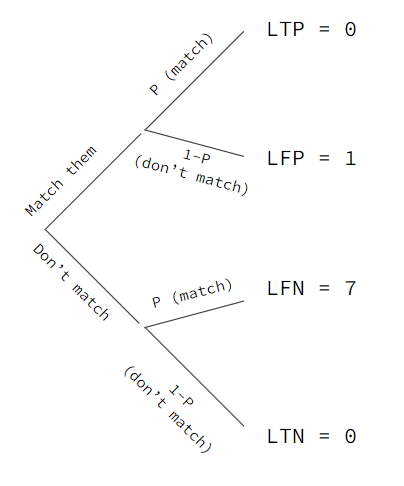

Thus our threshold for logistic regression is at $p$ such that:
$$(1-p) = 7p$$
$$p = \frac{1}{8}$$

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(m_X_train, m_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=88)

In [ ]:
# TODO: Matching model
# Assigned: Jane

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

m_y_prob = logreg.predict_proba(m_X_test)
m_y_pred = pd.Series([1 if x > 1/8 else 0 for x in m_y_prob[:,1]], index=m_y_test.index)

cm = confusion_matrix(m_y_test, m_y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(m_y_test, m_y_pred))
print ("\nFalse Negative Rate:", cm.ravel()[2]/(cm.ravel()[2]+cm.ravel()[3]))
print ("\nRecall:", cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2]))

Confusion Matrix: 
 [[480 962]
 [ 46 229]]

Accuracy: 0.41292952824694235

False Negative Rate: 0.16727272727272727

Recall: 0.8327272727272728


In [ ]:
match_boot = bootstrap_validation_cl(m_X_test, m_y_test, m_y_train, logreg, [calc_recall])

(500, 1)


The mean bootstrap recall estimate for the logistic regression model is: 0.831861017065495


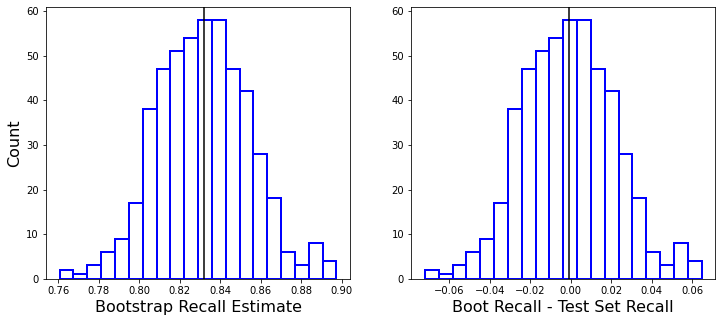

In [ ]:
test_recall = calc_recall(m_y_pred, m_y_test)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Recall Estimate', fontsize=16)
axs[1].set_xlabel('Boot Recall - Test Set Recall', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].axvline(np.mean(match_boot)[0], color='black')
axs[1].axvline(np.mean(match_boot)[0] - test_recall, color='black')
axs[0].hist(match_boot.iloc[:,0], bins=20,edgecolor='blue', linewidth=2,color = "white")
axs[1].hist(match_boot.iloc[:,0]-test_recall, bins=20,edgecolor='blue', linewidth=2,color = "white");
print('The mean bootstrap recall estimate for the logistic regression model is:', np.mean(match_boot)[0])

In [ ]:
import statistics
match_CI = np.quantile(match_boot.iloc[:,0],np.array([0.025,0.975]))

print('Mean: %.4f, Std: %.4f'%(statistics.mean(match_CI), statistics.stdev(match_CI)))
print("The 95-percent confidence interval of the recall of the logistic regression model is %s" % match_CI)

Mean: 0.8351, Std: 0.0652
The 95-percent confidence interval of the recall of the logistic regression model is [0.78896086 0.8812139 ]


## Attractiveness (Linear Regression + LDA)

Make linear model for this trait, perform feature selection.
Bootstrap your model and report the mean and 95% CI for OSR^2.

Run LDA on this trait. Bootstrap this model and report the mean and 95% CI for accuracy. Calculate OSR^2 as well.

Calculate rescaled OSR^2 using the two methods above.

## Attractiveness (Linear Regression - Feature Selection)

In [ ]:
# Fit linear model for attr_o
X_train = att_X_train.copy()
y_train = att_y_train.copy()
X_test = att_X_test.copy()
y_test = att_y_test.copy()

# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

# Fit the data to the model
att_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(att_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 attr_o   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     17.30
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          1.63e-159
Time:                        23:09:03   Log-Likelihood:                -13936.
No. Observations:                6900   AIC:                         2.799e+04
Df Residuals:                    6841   BIC:                         2.839e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1532      0.02

In [ ]:
#Check VIF values
# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns).sort_values(ascending=False)

att_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, att_cols).sort_values(ascending=False)

(1_1-2_1_o)_att      95.883120
attr1_1              80.324720
(1_1-2_1_o)_sinc     31.819265
sinc1_1              30.340062
intel1_1             29.681515
(1_1-2_1_o)_intel    28.427325
(1_1-2_1_o)_fun      25.898424
(1_1-2_1_o)_shar     24.979953
shar1_1              24.340068
(1_1-2_1_o)_amb      22.466463
fun1_1               21.241661
amb1_1               21.136814
museums_diff          4.540347
art_diff              4.162790
(3_1-pf_o)_att        3.460373
gender                3.027172
concerts_diff         2.311600
theater_diff          2.277512
income_diff           2.158708
age_diff              2.121926
sports_diff           2.097854
shopping_diff         2.091761
income                2.074683
age_o                 2.074345
(3_1-pf_o)_amb        1.945996
music_diff            1.908946
(3_1-pf_o)_sinc       1.890507
world_rank_o          1.887289
(3_1-pf_o)_intel      1.873177
tv_diff               1.814942
worldrank_diff        1.794804
tuition_o             1.791548
mn_sat_o

In [ ]:
#drop '(1_1-2_1_o)_att' since it has the highest VIF value
X_train = X_train.drop(columns=['(1_1-2_1_o)_att'])

att_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(att_model.summary())

att_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, att_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 attr_o   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     17.58
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          8.10e-160
Time:                        23:09:08   Log-Likelihood:                -13936.
No. Observations:                6900   AIC:                         2.799e+04
Df Residuals:                    6842   BIC:                         2.839e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1532      0.02

attr1_1              35.968707
intel1_1             14.936833
sinc1_1              14.856538
shar1_1              12.398473
fun1_1               10.857129
amb1_1               10.198082
museums_diff          4.538617
art_diff              4.153362
(3_1-pf_o)_att        3.447397
gender                2.995974
(1_1-2_1_o)_sinc      2.870162
(1_1-2_1_o)_intel     2.704528
(1_1-2_1_o)_shar      2.565785
(1_1-2_1_o)_fun       2.323775
concerts_diff         2.311463
theater_diff          2.277325
income_diff           2.151879
age_diff              2.121300
sports_diff           2.097533
shopping_diff         2.091760
income                2.070646
age_o                 2.067829
(1_1-2_1_o)_amb       2.001544
(3_1-pf_o)_amb        1.939053
music_diff            1.907767
(3_1-pf_o)_sinc       1.890376
world_rank_o          1.877699
(3_1-pf_o)_intel      1.872610
tv_diff               1.813526
worldrank_diff        1.794777
tuition_o             1.787085
mn_sat_o              1.780174
tvsport_

In [ ]:
approved_removed_cols = []
approved_removed_cols.append('(1_1-2_1_o)_att')  # other VIF values decreased

In [ ]:
#drop 'attr1_1' since it has the highest VIF value
X_train = X_train.drop(columns=['attr1_1'])

att_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(att_model.summary())

att_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, att_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 attr_o   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     17.89
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          1.96e-160
Time:                        23:09:13   Log-Likelihood:                -13937.
No. Observations:                6900   AIC:                         2.799e+04
Df Residuals:                    6843   BIC:                         2.838e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1532      0.02

museums_diff         4.538596
art_diff             4.153276
(3_1-pf_o)_att       3.447175
gender               2.973512
(1_1-2_1_o)_sinc     2.869920
intel1_1             2.801325
(1_1-2_1_o)_intel    2.703701
sinc1_1              2.656031
(1_1-2_1_o)_shar     2.562437
shar1_1              2.372136
(1_1-2_1_o)_fun      2.323497
concerts_diff        2.306856
theater_diff         2.272559
amb1_1               2.259785
fun1_1               2.247478
income_diff          2.151005
age_diff             2.121017
sports_diff          2.095541
shopping_diff        2.087609
income               2.070576
age_o                2.067261
(1_1-2_1_o)_amb      2.001191
(3_1-pf_o)_amb       1.938361
music_diff           1.904323
(3_1-pf_o)_sinc      1.890307
world_rank_o         1.877146
(3_1-pf_o)_intel     1.871075
tv_diff              1.813454
worldrank_diff       1.794581
tuition_o            1.787076
mn_sat_o             1.780038
tvsport_diff         1.732384
movies_diff          1.729719
masters_o 

In [ ]:
approved_removed_cols.append('attr1_1')  # other VIF values decreased a lot

In [ ]:
#drop '(1_1-2_1_o)_shar' since it has the highest p-value
X_train = X_train.drop(columns=['(1_1-2_1_o)_shar'])

att_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(att_model.summary())

att_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, att_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 attr_o   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     18.22
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          4.57e-161
Time:                        23:09:17   Log-Likelihood:                -13937.
No. Observations:                6900   AIC:                         2.799e+04
Df Residuals:                    6844   BIC:                         2.837e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1532      0.02

museums_diff         4.538558
art_diff             4.153078
(3_1-pf_o)_att       3.081753
gender               2.959438
(1_1-2_1_o)_sinc     2.842994
intel1_1             2.799884
(1_1-2_1_o)_intel    2.702940
sinc1_1              2.628082
(1_1-2_1_o)_fun      2.302810
concerts_diff        2.299249
theater_diff         2.267606
amb1_1               2.259780
fun1_1               2.243832
income_diff          2.147704
age_diff             2.118805
shopping_diff        2.080462
sports_diff          2.073331
income               2.068325
age_o                2.067115
(1_1-2_1_o)_amb      1.996194
(3_1-pf_o)_amb       1.903387
music_diff           1.898172
world_rank_o         1.874780
(3_1-pf_o)_sinc      1.841958
tv_diff              1.813328
worldrank_diff       1.790670
tuition_o            1.784377
mn_sat_o             1.779908
(3_1-pf_o)_intel     1.748012
tvsport_diff         1.728273
movies_diff          1.728025
masters_o            1.685027
masters_m            1.618857
dining_dif

In [ ]:
approved_removed_cols.append('(1_1-2_1_o)_shar')  # other p-values decreased

In [ ]:
#drop 'museums_diff' since it has the high p-value
X_train = X_train.drop(columns=['fun1_1'])

att_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(att_model.summary())

att_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, att_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 attr_o   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     18.56
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          1.06e-161
Time:                        23:09:21   Log-Likelihood:                -13937.
No. Observations:                6900   AIC:                         2.798e+04
Df Residuals:                    6845   BIC:                         2.836e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1532      0.02

museums_diff         4.532906
art_diff             4.143681
(3_1-pf_o)_att       3.078259
gender               2.907303
(1_1-2_1_o)_sinc     2.835078
intel1_1             2.707532
(1_1-2_1_o)_intel    2.686753
sinc1_1              2.569689
concerts_diff        2.298104
theater_diff         2.267606
amb1_1               2.196664
income_diff          2.147667
age_diff             2.108847
shopping_diff        2.077613
sports_diff          2.072164
income               2.064298
age_o                2.061541
(1_1-2_1_o)_amb      1.938591
music_diff           1.897096
(3_1-pf_o)_amb       1.876792
world_rank_o         1.872655
(3_1-pf_o)_sinc      1.837699
tv_diff              1.812107
worldrank_diff       1.787809
tuition_o            1.783326
mn_sat_o             1.779899
(3_1-pf_o)_intel     1.747884
movies_diff          1.727995
tvsport_diff         1.721554
masters_o            1.680493
masters_m            1.615264
dining_diff          1.514940
gaming_diff          1.488833
(3_1-pf_o)

In [ ]:
approved_removed_cols.append('fun1_1')  # other p-values decreased

In [ ]:
#drop 'income' since it has the high p-value
X_train = X_train.drop(columns=['income'])

att_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(att_model.summary())

att_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, att_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 attr_o   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     18.91
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          2.49e-162
Time:                        23:09:25   Log-Likelihood:                -13937.
No. Observations:                6900   AIC:                         2.798e+04
Df Residuals:                    6846   BIC:                         2.835e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1532      0.02

museums_diff         4.532026
art_diff             4.141707
(3_1-pf_o)_att       3.063232
gender               2.906723
(1_1-2_1_o)_sinc     2.833106
intel1_1             2.707264
(1_1-2_1_o)_intel    2.685474
sinc1_1              2.568632
concerts_diff        2.297932
theater_diff         2.267440
amb1_1               2.196469
age_diff             2.106473
shopping_diff        2.076122
sports_diff          2.071191
age_o                2.054998
(1_1-2_1_o)_amb      1.937974
music_diff           1.895512
world_rank_o         1.872589
(3_1-pf_o)_amb       1.869063
(3_1-pf_o)_sinc      1.835867
tv_diff              1.811233
worldrank_diff       1.786953
tuition_o            1.780399
mn_sat_o             1.779303
(3_1-pf_o)_intel     1.743903
movies_diff          1.727935
tvsport_diff         1.720440
masters_o            1.680329
masters_m            1.615252
dining_diff          1.514938
gaming_diff          1.488774
(3_1-pf_o)_fun       1.473840
hiking_diff          1.415321
exercise_d

In [ ]:
approved_removed_cols.append('income')  # other p-values decreased

In [ ]:
#drop 'museums_diff' since it has the high p-value
X_train = X_train.drop(columns=['museums_diff'])

att_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(att_model.summary())

att_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, att_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 attr_o   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     19.28
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          5.80e-163
Time:                        23:09:29   Log-Likelihood:                -13937.
No. Observations:                6900   AIC:                         2.798e+04
Df Residuals:                    6847   BIC:                         2.834e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1532      0.02

(3_1-pf_o)_att       3.058757
gender               2.890145
(1_1-2_1_o)_sinc     2.832389
intel1_1             2.680680
(1_1-2_1_o)_intel    2.672138
sinc1_1              2.564879
concerts_diff        2.297583
theater_diff         2.200760
amb1_1               2.195358
age_diff             2.106443
sports_diff          2.070885
shopping_diff        2.054540
age_o                2.054500
(1_1-2_1_o)_amb      1.930681
music_diff           1.895314
world_rank_o         1.872580
(3_1-pf_o)_amb       1.866416
(3_1-pf_o)_sinc      1.835765
tv_diff              1.804278
worldrank_diff       1.782965
tuition_o            1.779179
mn_sat_o             1.776835
(3_1-pf_o)_intel     1.736801
art_diff             1.733083
movies_diff          1.726070
tvsport_diff         1.709410
masters_o            1.680254
masters_m            1.615055
gaming_diff          1.479677
(3_1-pf_o)_fun       1.473590
dining_diff          1.470016
hiking_diff          1.411198
exercise_diff        1.366302
yoga_diff 

In [ ]:
approved_removed_cols.append('museums_diff')  # other p-values decreased

In [ ]:
#drop 'museums_diff' since it has the high p-value
X_train = X_train.drop(columns=['hiking_diff'])

att_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(att_model.summary())

att_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, att_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 attr_o   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     19.65
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          1.37e-163
Time:                        23:09:32   Log-Likelihood:                -13937.
No. Observations:                6900   AIC:                         2.798e+04
Df Residuals:                    6848   BIC:                         2.833e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1532      0.02

(3_1-pf_o)_att       3.056314
(1_1-2_1_o)_sinc     2.831413
gender               2.814626
intel1_1             2.679126
(1_1-2_1_o)_intel    2.671744
sinc1_1              2.563722
concerts_diff        2.247737
theater_diff         2.200580
amb1_1               2.195337
age_diff             2.106443
age_o                2.054463
shopping_diff        1.992249
sports_diff          1.988343
(1_1-2_1_o)_amb      1.930509
world_rank_o         1.872412
(3_1-pf_o)_amb       1.866327
music_diff           1.865697
(3_1-pf_o)_sinc      1.830129
tv_diff              1.794083
tuition_o            1.779179
worldrank_diff       1.778283
mn_sat_o             1.775262
(3_1-pf_o)_intel     1.735800
movies_diff          1.725785
art_diff             1.708855
tvsport_diff         1.694131
masters_o            1.675816
masters_m            1.612274
(3_1-pf_o)_fun       1.469180
dining_diff          1.459898
gaming_diff          1.396952
exercise_diff        1.366298
yoga_diff            1.304617
(1_1-2_1_o

In [ ]:
approved_removed_cols.append('hiking_diff')  # other p-values decreased

In [ ]:
#drop 'museums_diff' since it has the high p-value
X_train = X_train.drop(columns=['goal_m'])

att_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(att_model.summary())

att_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, att_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 attr_o   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     20.05
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          3.20e-164
Time:                        23:09:34   Log-Likelihood:                -13937.
No. Observations:                6900   AIC:                         2.798e+04
Df Residuals:                    6849   BIC:                         2.832e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1532      0.02

(3_1-pf_o)_att       3.055405
(1_1-2_1_o)_sinc     2.831411
gender               2.814507
intel1_1             2.679087
(1_1-2_1_o)_intel    2.671154
sinc1_1              2.562937
concerts_diff        2.247731
theater_diff         2.200279
amb1_1               2.194957
age_diff             2.104126
age_o                2.048868
shopping_diff        1.992051
sports_diff          1.988166
(1_1-2_1_o)_amb      1.930196
world_rank_o         1.872410
(3_1-pf_o)_amb       1.866319
music_diff           1.865683
(3_1-pf_o)_sinc      1.829029
tv_diff              1.793874
tuition_o            1.779051
worldrank_diff       1.778262
mn_sat_o             1.775213
(3_1-pf_o)_intel     1.735462
movies_diff          1.725465
art_diff             1.708783
tvsport_diff         1.694073
masters_o            1.674040
masters_m            1.612270
(3_1-pf_o)_fun       1.469153
dining_diff          1.459890
gaming_diff          1.396942
exercise_diff        1.366059
yoga_diff            1.304585
(1_1-2_1_o

In [ ]:
approved_removed_cols.append('goal_m')  # other p-values decreased

In [ ]:
#drop 'museums_diff' since it has the high p-value
X_train = X_train.drop(columns=['(3_1-pf_o)_sinc'])

att_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(att_model.summary())

att_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, att_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 attr_o   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     20.46
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          7.18e-165
Time:                        23:09:36   Log-Likelihood:                -13937.
No. Observations:                6900   AIC:                         2.797e+04
Df Residuals:                    6850   BIC:                         2.832e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1532      0.02

(1_1-2_1_o)_sinc     2.815046
gender               2.814104
intel1_1             2.672348
(1_1-2_1_o)_intel    2.670843
sinc1_1              2.553804
concerts_diff        2.247646
theater_diff         2.199132
amb1_1               2.170134
(3_1-pf_o)_att       2.154418
age_diff             2.102464
age_o                2.048839
shopping_diff        1.991908
sports_diff          1.979650
(1_1-2_1_o)_amb      1.922838
world_rank_o         1.872410
music_diff           1.865054
tv_diff              1.793532
worldrank_diff       1.778245
tuition_o            1.767354
mn_sat_o             1.762984
movies_diff          1.721299
art_diff             1.706221
tvsport_diff         1.693238
masters_o            1.670730
(3_1-pf_o)_amb       1.625256
masters_m            1.612248
dining_diff          1.459565
(3_1-pf_o)_intel     1.446333
gaming_diff          1.395927
exercise_diff        1.366055
yoga_diff            1.304502
(3_1-pf_o)_fun       1.262703
(1_1-2_1_o)_fun      1.245032
go_out_dif

In [ ]:
approved_removed_cols.append('(3_1-pf_o)_sinc')  # other p-values decreased

In [ ]:
#drop '(3_1-pf_o)_fun' since it has the high p-value
X_train = X_train.drop(columns=['(3_1-pf_o)_fun'])

att_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(att_model.summary())

att_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, att_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 attr_o   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     20.88
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          1.79e-165
Time:                        23:09:38   Log-Likelihood:                -13937.
No. Observations:                6900   AIC:                         2.797e+04
Df Residuals:                    6851   BIC:                         2.831e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1532      0.02

gender               2.811077
(1_1-2_1_o)_sinc     2.794560
intel1_1             2.661843
(1_1-2_1_o)_intel    2.654019
sinc1_1              2.542175
concerts_diff        2.234862
theater_diff         2.191478
amb1_1               2.170128
age_diff             2.102037
age_o                2.040975
(3_1-pf_o)_att       2.027823
sports_diff          1.979035
shopping_diff        1.978833
(1_1-2_1_o)_amb      1.918303
world_rank_o         1.872408
music_diff           1.859115
tv_diff              1.791912
worldrank_diff       1.777732
tuition_o            1.766923
mn_sat_o             1.761390
movies_diff          1.721145
art_diff             1.698587
tvsport_diff         1.689744
masters_o            1.664123
masters_m            1.612232
(3_1-pf_o)_amb       1.566666
dining_diff          1.457287
gaming_diff          1.394292
exercise_diff        1.365104
(3_1-pf_o)_intel     1.355412
yoga_diff            1.302830
date_diff            1.241033
go_out_diff          1.221980
reading_di

In [ ]:
approved_removed_cols.append('(3_1-pf_o)_fun')  # other p-values decreased

Overview: First, after dropping the feature with highest VIF (in the very first OLS model trained on all features), other VIF values improved and lowered. But, the R2 and Adjusted R2 remained the same. Second, after dropping the next feature  with highest VIF, other VIF values improved and lowered again. But, the R2 and Adjusted R2 remained the same. Next, in our third OLS model iteration, since the VIF values are all now low, we drop the feature with the highest p-value. Other p-values and VIF values seemed to improve with each feature with the high p-value dropped. But, the R2 and Adjusted R2 remain the same. Therefore, since the R2 and Adjusted R2 continue to remain the same and since the VIF values are all low and p-values relatively low, the above model is our final linear regression model for attractiveness.

## Attractiveness (Linear Regression - Bootstrap OSR2)

In [ ]:
approved_removed_cols

['(1_1-2_1_o)_att',
 'attr1_1',
 '(1_1-2_1_o)_shar',
 'fun1_1',
 'income',
 'museums_diff',
 'hiking_diff',
 'goal_m',
 '(3_1-pf_o)_sinc',
 '(3_1-pf_o)_fun']

In [ ]:
#define the current model as the final model "att_lr"
att_lr = att_model

#remove the variables from test set
X_test = X_test.drop(columns = approved_removed_cols)

y_pred = att_lr.predict(sm.add_constant(X_test))

In [ ]:
y_pred

3635    5.213655
345     7.497802
7621    6.030626
5572    6.153742
2437    6.536251
          ...   
3627    4.765776
1468    5.495794
603     5.115442
2632    6.404941
7342    5.580319
Length: 1725, dtype: float64

In [ ]:
# compute out-of-sample R-squared using the test set
def OSR2(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

# Check OSR^2 with test set
att_test_OSR2 = OSR2(att_lr.predict(sm.add_constant(X_test)), y_test, y_train)
print("Test OSR2: \n", att_test_OSR2)

Test OSR2: 
 0.08263346804105587


In [ ]:
att_bs_output_lr = bootstrap_validation(sm.add_constant(X_test),y_test,y_train,att_lr,
                                 metrics_list=[OSR2],
                                 sample = 5000)

(5000, 1)


(array([  2.,   6.,   8.,  50.,  72., 137., 279., 435., 586., 703., 674.,
        643., 525., 401., 236., 128.,  65.,  34.,  13.,   3.]),
 array([-0.05592928, -0.05053242, -0.04513555, -0.03973869, -0.03434183,
        -0.02894496, -0.0235481 , -0.01815124, -0.01275437, -0.00735751,
        -0.00196065,  0.00343622,  0.00883308,  0.01422995,  0.01962681,
         0.02502367,  0.03042054,  0.0358174 ,  0.04121426,  0.04661113,
         0.05200799]),
 <a list of 20 Patch objects>)

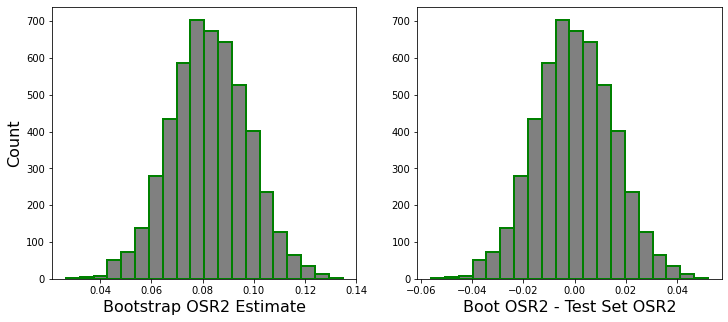

In [ ]:
#bootstrap plots
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap OSR2 Estimate', fontsize=16)
axs[1].set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(att_bs_output_lr.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(att_bs_output_lr.iloc[:,0]-att_test_OSR2, bins=20,edgecolor='green', linewidth=2,color = "grey")

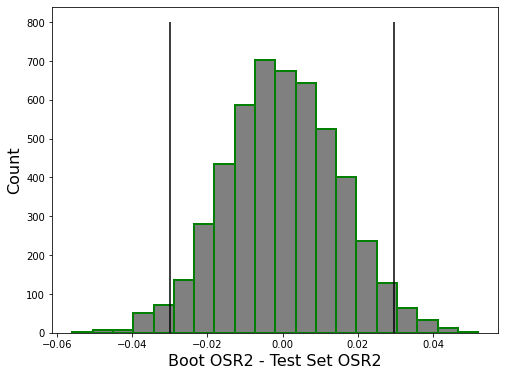

In [ ]:
# The 95% confidence interval
CI_0 = np.quantile(att_bs_output_lr.iloc[:,0]-att_test_OSR2,np.array([0.025,0.975]))
CI = [0,0]
CI[0] = att_test_OSR2 - CI_0[1]
CI[1] = att_test_OSR2 - CI_0[0]
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(att_bs_output_lr.iloc[:,0]-att_test_OSR2, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.vlines(x=CI_0[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI_0[1], ymin = 0, ymax =800, color = "black")

In [ ]:
import statistics
print('The bootstrapped mean of linear regression is: %s' % np.mean(att_bs_output_lr)[0])

print("The 95-percent confidence interval of the test set OSR2 for the linear regression attractiveness model is %s" % CI)

The bootstrapped mean of linear regression is: 0.08264157708774161
The 95-percent confidence interval of the test set OSR2 for the linear regression attractiveness model is [0.05296610191541393, 0.11252961420726236]


## Attractiveness (LDA - Train Model + Bootstrap Accuracy)]

In [ ]:
# Run LDA on attractiveness trait.
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# redefine y_train/y_test type to int
y_train = att_y_train.astype(int)
y_test = att_y_test.astype(int)

# train
att_lda = LinearDiscriminantAnalysis()
att_lda.fit(sm.add_constant(att_X_train), y_train)

LinearDiscriminantAnalysis()

In [ ]:
# compute attractivness accuracy of LDA
from sklearn.metrics import accuracy_score
y_pred = att_lda.predict(sm.add_constant(att_X_test))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)
att_test_lda_acc = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", att_test_lda_acc)

Confusion Matrix : 
 [[  0   0   0   0   0   0   2   1   0   0   0]
 [  0   4   0   0   2   4   6   5   1   0   2]
 [  1   1   1   0   5   8  13  11   3   0   0]
 [  0   2   0   2  11  21  35  21   2   2   4]
 [  0   0   2   1  22  30  53  44  11   1   1]
 [  2   4   4   0  15  56 101  77  14   0   3]
 [  0   1   4   1  17  37 120 117  25   0  12]
 [  0   1   0   2  15  27 125 121  36   1  14]
 [  0   1   3   0   2  23  97  94  45   1  11]
 [  0   0   0   0   0   8  34  32  12   1   9]
 [  0   0   0   0   0   4  16  23   8   4  10]]

Test Set Accuracy: 0.22144927536231884


In [ ]:
# Bootstrap LDA model and report the mean and 95% CI for accuracy. 
def acc(predictions, y_test, y_train):
  return accuracy_score(y_test, predictions)

att_bs_output_lda_acc = bootstrap_validation(sm.add_constant(att_X_test),y_test,y_train,att_lda,
                                 metrics_list=[acc],
                                 sample = 5000)

(5000, 1)


(array([ 12.,  10.,  36.,  83., 133., 277., 381., 518., 627., 716., 726.,
        541., 396., 251., 150.,  71.,  44.,  15.,   9.,   4.]),
 array([-0.03362319, -0.03008696, -0.02655072, -0.02301449, -0.01947826,
        -0.01594203, -0.0124058 , -0.00886957, -0.00533333, -0.0017971 ,
         0.00173913,  0.00527536,  0.00881159,  0.01234783,  0.01588406,
         0.01942029,  0.02295652,  0.02649275,  0.03002899,  0.03356522,
         0.03710145]),
 <a list of 20 Patch objects>)

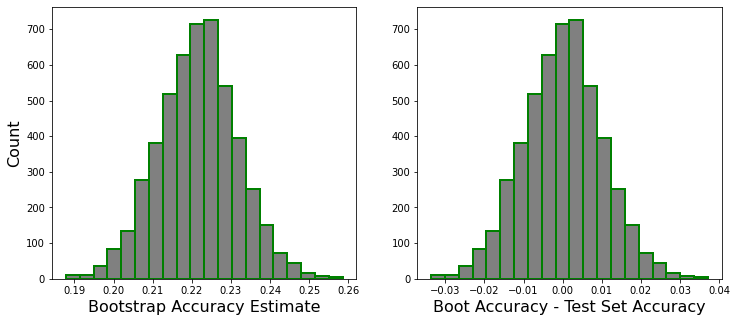

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boot Accuracy - Test Set Accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(att_bs_output_lda_acc.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(att_bs_output_lda_acc.iloc[:,0]-att_test_lda_acc, bins=20,edgecolor='green', linewidth=2,color = "grey")

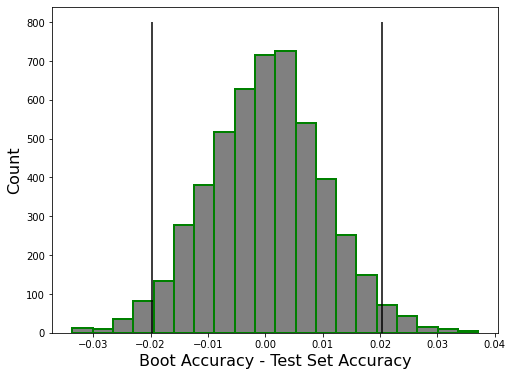

In [ ]:
# The 95% confidence interval
CI_0 = np.quantile(att_bs_output_lda_acc.iloc[:,0]-att_test_lda_acc,np.array([0.025,0.975]))
CI = [0,0]
CI[0] = att_test_lda_acc - CI_0[1]
CI[1] = att_test_lda_acc - CI_0[0]
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot Accuracy - Test Set Accuracy', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(att_bs_output_lda_acc.iloc[:,0]-att_test_lda_acc, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.vlines(x=CI_0[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI_0[1], ymin = 0, ymax =800, color = "black")

In [ ]:
import statistics
print('The bootstrapped mean of LDA Accuracy is:', np.mean(att_bs_output_lda_acc)[0])
print("The 95-percent confidence interval of the test set accuuracy for the LDA attractiveness model is %s" % CI)

The bootstrapped mean of LDA Accuracy is: 0.22151744927536432
The 95-percent confidence interval of the test set accuuracy for the LDA attractiveness model is [0.2011594202898551, 0.24115942028985507]


## Attractiveness (Rescaled OSR^2 & Baseline Comparisons)

In [ ]:
base_att = 1 - (np.sum((att_y_test - att_y_train.value_counts().index[0])**2)/np.sum((att_y_test - np.mean(att_y_train))**2))
rm1_lr_att = rescaled_OSR2_1(att_lr, att_y_train, att_test.drop(columns = approved_removed_cols), 'attr_o', 'lr')
rm2_lr_att = rescaled_OSR2_2(att_lr, att_y_train, att_test.drop(columns = approved_removed_cols), 'attr_o', 'lr')
rm1_lda_att = rescaled_OSR2_1(att_lda, att_y_train, att_test, 'attr_o', 'lda')
rm2_lda_att = rescaled_OSR2_1(att_lda, att_y_train, att_test, 'attr_o', 'lda')

print('NON-RESCALED:')
non_rescaled_models_OSR2 = {"LR OSR2": np.mean(att_bs_output_lr)[0], "LDA Accuracy": np.mean(att_bs_output_lda_acc)[0]}
print('Models for Attractiveness:')
print('No Rescale Bootstrapped Mean, Linear Regression OSR2 for Attractiveness:', np.mean(att_bs_output_lr)[0])
print('No Rescale Bootstrapped Mean, LDA Accuracy for Attractiveness:', np.mean(att_bs_output_lda_acc)[0])
print()
print('Rescaling Linear Regression Model before OSR2 Calculation:')
print('Rescale Method 1, Linear Regression Sincerity OSR2:', rm1_lr_att)
print('Rescale Method 2, Linear Regression Sincerity OSR2:', rm2_lr_att)
print()
print('BASELINE:')
print('Baseline OSR2:', base_att)
print()
print('ATTRACTIVENESS MODEL COMPARISONS:')
print('OSR2 difference between LR model and baseline:', np.amax(np.array([rm1_lr_att, rm2_lr_att, rm1_lda_att, rm2_lda_att, np.mean(att_bs_output_lr)[0]])) - base_att)
print('Accuracy difference for LDA and baseline:', np.mean(att_bs_output_lda_acc)[0] - att_y_train.value_counts().values[0]/np.sum(att_y_train.value_counts()))

NON-RESCALED:
Models for Attractiveness:
No Rescale Bootstrapped Mean, Linear Regression OSR2 for Attractiveness: 0.08264157708774161
No Rescale Bootstrapped Mean, LDA Accuracy for Attractiveness: 0.22151744927536432

Rescaling Linear Regression Model before OSR2 Calculation:
Rescale Method 1, Linear Regression Sincerity OSR2: -5.267815217298948
Rescale Method 2, Linear Regression Sincerity OSR2: -4.672718450019012

BASELINE:
Baseline OSR2: -0.004502690764422779

ATTRACTIVENESS MODEL COMPARISONS:
OSR2 difference between LR model and baseline: 0.08714426785216439
Accuracy difference for LDA and baseline: 0.015575420289857062


## Sincerity (Linear Regression + LDA)

Make linear model for this trait, perform feature selection.
Bootstrap your model and report the mean and 95% CI for OSR^2.

Run LDA on this trait. Bootstrap this model and report the mean and 95% CI for accuracy. Calculate OSR^2 as well.

Calculate rescaled OSR^2 using the two methods above.

## Sincerity (Linear Regression - Feature Selection)

In [ ]:
# Fit linear model for sinc_o
X_train = sin_X_train.copy()
y_train = sin_y_train.copy()
X_test = sin_X_test.copy()
y_test = sin_y_test.copy()
# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

# Fit the data to the model
sin_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sinc_o   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     8.833
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           8.30e-71
Time:                        23:10:32   Log-Likelihood:                -13226.
No. Observations:                6849   AIC:                         2.657e+04
Df Residuals:                    6790   BIC:                         2.697e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.1616      0.02

In [ ]:
#Check VIF values
sin_cols = X_train.drop(columns = ['const']).columns.to_list()

VIF(X_train, sin_cols).sort_values(ascending=False)


(1_1-2_1_o)_att      92.662468
attr1_1              82.356616
sinc1_1              30.973064
(1_1-2_1_o)_sinc     30.149949
intel1_1             29.586034
(1_1-2_1_o)_intel    27.111868
shar1_1              25.394311
(1_1-2_1_o)_fun      24.779600
(1_1-2_1_o)_shar     24.429000
amb1_1               21.569322
fun1_1               21.433765
(1_1-2_1_o)_amb      20.950659
museums_diff          4.478008
art_diff              4.164241
(3_1-pf_o)_att        3.579080
gender                2.992396
concerts_diff         2.363950
theater_diff          2.315230
age_diff              2.202690
age_o                 2.151545
income_diff           2.150737
shopping_diff         2.102889
sports_diff           2.092564
income                2.083709
(3_1-pf_o)_amb        1.967482
music_diff            1.925903
(3_1-pf_o)_intel      1.882815
world_rank_o          1.873417
(3_1-pf_o)_sinc       1.859124
tv_diff               1.818135
worldrank_diff        1.778769
tuition_o             1.763842
tvsport_

In [ ]:
#drop '(1_1-2_1_o)_att' since it has the highest VIF value
X_train = X_train.drop(columns=['(1_1-2_1_o)_att'])

sin_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sinc_o   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     8.966
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           4.75e-71
Time:                        23:10:35   Log-Likelihood:                -13227.
No. Observations:                6849   AIC:                         2.657e+04
Df Residuals:                    6791   BIC:                         2.697e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.1616      0.02

In [ ]:
#Check VIF values again
sin_cols = X_train.drop(columns = ['const']).columns.to_list()

VIF(X_train, sin_cols).sort_values(ascending=False)



attr1_1              39.878240
sinc1_1              16.250240
intel1_1             15.764493
shar1_1              13.718254
fun1_1               11.584725
amb1_1               11.189660
museums_diff          4.477383
art_diff              4.156704
(3_1-pf_o)_att        3.562535
gender                2.956683
(1_1-2_1_o)_sinc      2.798632
(1_1-2_1_o)_intel     2.660289
(1_1-2_1_o)_shar      2.574410
concerts_diff         2.363878
theater_diff          2.314979
(1_1-2_1_o)_fun       2.281163
age_diff              2.202490
age_o                 2.147134
income_diff           2.144652
shopping_diff         2.102793
sports_diff           2.092524
income                2.079046
(1_1-2_1_o)_amb       1.983249
(3_1-pf_o)_amb        1.961276
music_diff            1.925504
(3_1-pf_o)_intel      1.882200
world_rank_o          1.865222
(3_1-pf_o)_sinc       1.859109
tv_diff               1.816202
worldrank_diff        1.778762
tuition_o             1.757809
tvsport_diff          1.756749
mn_sat_o

In [ ]:
#drop 'attr1_1 ' since it has the highest VIF value now
X_train = X_train.drop(columns=['attr1_1'])

sin_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sinc_o   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     9.124
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.71e-71
Time:                        23:10:37   Log-Likelihood:                -13227.
No. Observations:                6849   AIC:                         2.657e+04
Df Residuals:                    6792   BIC:                         2.696e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.1616      0.02

In [ ]:
#Check VIF values again
sin_cols = X_train.drop(columns = ['const']).columns.to_list()

VIF(X_train, sin_cols).sort_values(ascending=False)

museums_diff         4.477379
art_diff             4.156036
(3_1-pf_o)_att       3.562320
gender               2.935958
(1_1-2_1_o)_sinc     2.798327
intel1_1             2.734650
(1_1-2_1_o)_intel    2.660220
sinc1_1              2.628547
(1_1-2_1_o)_shar     2.571822
shar1_1              2.392135
concerts_diff        2.357381
theater_diff         2.309739
(1_1-2_1_o)_fun      2.281086
amb1_1               2.242851
fun1_1               2.208265
age_diff             2.202470
age_o                2.145410
income_diff          2.144604
shopping_diff        2.096102
sports_diff          2.089623
income               2.079037
(1_1-2_1_o)_amb      1.983235
(3_1-pf_o)_amb       1.960645
music_diff           1.921640
(3_1-pf_o)_intel     1.881042
world_rank_o         1.864783
(3_1-pf_o)_sinc      1.859066
tv_diff              1.816200
worldrank_diff       1.778659
tuition_o            1.757596
tvsport_diff         1.749295
mn_sat_o             1.742854
movies_diff          1.733216
masters_o 

In [ ]:
#drop 'museums_diff' since it has the highest VIF value now
X_train = X_train.drop(columns=['museums_diff'])

sin_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sinc_o   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     9.291
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           5.58e-72
Time:                        23:10:40   Log-Likelihood:                -13227.
No. Observations:                6849   AIC:                         2.657e+04
Df Residuals:                    6793   BIC:                         2.695e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.1616      0.02

In [ ]:
#Check VIF values again
sin_cols = X_train.drop(columns = ['const']).columns.to_list()

VIF(X_train, sin_cols).sort_values(ascending=False)

(3_1-pf_o)_att       3.559574
gender               2.924254
(1_1-2_1_o)_sinc     2.796545
intel1_1             2.708356
(1_1-2_1_o)_intel    2.651283
sinc1_1              2.623767
(1_1-2_1_o)_shar     2.571546
shar1_1              2.392113
concerts_diff        2.356906
(1_1-2_1_o)_fun      2.279493
theater_diff         2.253347
amb1_1               2.241606
fun1_1               2.205342
age_diff             2.202455
age_o                2.144205
income_diff          2.135653
sports_diff          2.089019
income               2.078810
shopping_diff        2.073500
(1_1-2_1_o)_amb      1.974869
(3_1-pf_o)_amb       1.957542
music_diff           1.921381
(3_1-pf_o)_intel     1.875603
world_rank_o         1.864028
(3_1-pf_o)_sinc      1.858839
tv_diff              1.811450
worldrank_diff       1.772810
tuition_o            1.756946
art_diff             1.755120
mn_sat_o             1.741688
tvsport_diff         1.737984
movies_diff          1.730491
masters_o            1.710981
masters_m 

In [ ]:
#drop '(3_1-pf_o)_att' since it has the highest VIF value now
X_train = X_train.drop(columns=['(3_1-pf_o)_att'])

sin_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sinc_o   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     9.315
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           5.30e-71
Time:                        23:10:42   Log-Likelihood:                -13231.
No. Observations:                6849   AIC:                         2.657e+04
Df Residuals:                    6794   BIC:                         2.695e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.1616      0.02

In [ ]:
#Check VIF values again
sin_cols = X_train.drop(columns = ['const']).columns.to_list()

VIF(X_train, sin_cols).sort_values(ascending=False)

gender               2.785052
intel1_1             2.707375
(1_1-2_1_o)_sinc     2.659193
(1_1-2_1_o)_intel    2.643256
sinc1_1              2.580332
concerts_diff        2.344970
(1_1-2_1_o)_shar     2.294173
shar1_1              2.284098
theater_diff         2.252933
(1_1-2_1_o)_fun      2.247841
fun1_1               2.199937
age_diff             2.198523
amb1_1               2.167806
age_o                2.142437
income_diff          2.129243
income               2.073729
sports_diff          2.071607
shopping_diff        2.046948
(1_1-2_1_o)_amb      1.926082
music_diff           1.917513
world_rank_o         1.861492
tv_diff              1.809697
worldrank_diff       1.771826
tuition_o            1.755498
art_diff             1.755080
mn_sat_o             1.741580
tvsport_diff         1.737964
movies_diff          1.729373
masters_o            1.707481
masters_m            1.633283
dining_diff          1.494140
gaming_diff          1.472328
(3_1-pf_o)_amb       1.416413
hiking_dif

All VIF values look small, let remove the large p-value next

In [ ]:
#from our newest model, let's remove 'tvsport_diff' which has the largest p-value
X_train = X_train.drop(columns=['tvsport_diff'])

sin_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sinc_o   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     9.492
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.71e-71
Time:                        23:10:44   Log-Likelihood:                -13231.
No. Observations:                6849   AIC:                         2.657e+04
Df Residuals:                    6795   BIC:                         2.694e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.1616      0.02

In [ ]:
#from our newest model, let's remove 'masters_m' which has the largest p-value
X_train = X_train.drop(columns=['masters_m'])

sin_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sinc_o   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     9.676
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           5.47e-72
Time:                        23:10:44   Log-Likelihood:                -13231.
No. Observations:                6849   AIC:                         2.657e+04
Df Residuals:                    6796   BIC:                         2.693e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.1616      0.02

In [ ]:
#from our newest model, let's remove 'date_diff' which has the largest p-value
X_train = X_train.drop(columns=['date_diff'])

sin_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sinc_o   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     9.867
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.74e-72
Time:                        23:10:44   Log-Likelihood:                -13231.
No. Observations:                6849   AIC:                         2.657e+04
Df Residuals:                    6797   BIC:                         2.692e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.1616      0.02

In [ ]:
#from our newest model, let's remove 'tuition_o' which has the largest p-value
X_train = X_train.drop(columns=['tuition_o'])

sin_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sinc_o   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     10.06
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           5.71e-73
Time:                        23:10:45   Log-Likelihood:                -13231.
No. Observations:                6849   AIC:                         2.656e+04
Df Residuals:                    6798   BIC:                         2.691e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.1616      0.02

In [ ]:
#from our newest model, let's remove 'imprelig_m' which has the largest p-value
X_train = X_train.drop(columns=['imprelig_m'])

sin_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sinc_o   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     10.27
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.89e-73
Time:                        23:10:45   Log-Likelihood:                -13231.
No. Observations:                6849   AIC:                         2.656e+04
Df Residuals:                    6799   BIC:                         2.690e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.1616      0.02

I have removed some variables with super large p-values, and I will use the current model as my final linear model for sin_o attribute.

## Sincerity (Linear Regression - Bootstrap OSR2)

In [ ]:
#define the current model as the final model "sin_lr"
sin_lr = sin_model

#remove the variables from test set
X_test = X_test.drop(columns = ['(1_1-2_1_o)_att','attr1_1','museums_diff','(3_1-pf_o)_att','tvsport_diff','masters_m','date_diff','tuition_o','imprelig_m'])


In [ ]:
# compute out-of-sample R-squared using the test set
def sin_OSR2(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

In [ ]:
# Check OSR^2 with test set
sin_test_OSR2 = sin_OSR2(sin_lr.predict(sm.add_constant(X_test)), y_test, y_train)
sin_test_OSR2

0.05559619437240437

In [ ]:
sin_bs_output_lr = bootstrap_validation(sm.add_constant(X_test),y_test,y_train,sin_lr,
                                 metrics_list=[sin_OSR2],
                                 sample = 5000)

(5000, 1)


(-0.05, 0.05)

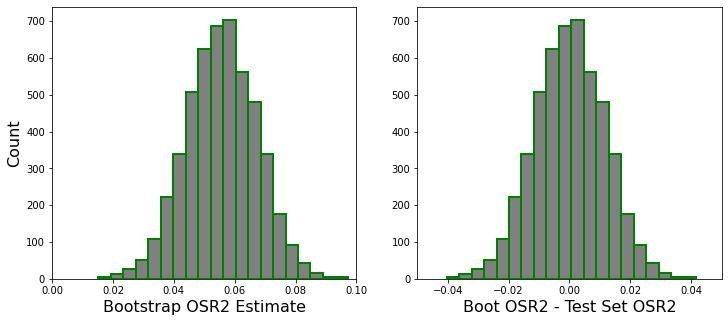

In [ ]:
#bootstrap plots
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap OSR2 Estimate', fontsize=16)
axs[1].set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(sin_bs_output_lr.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.0,0.1])
axs[1].hist(sin_bs_output_lr.iloc[:,0]-sin_test_OSR2, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.05,0.05])

In [ ]:
print('The bootstrapped mean of linear regression OSR2 is:', np.mean(sin_bs_output_lr)[0])

The bootstrapped mean of linear regression OSR2 is: 0.05566328871978967


In [ ]:
# The 95% confidence interval
CI_0 = np.quantile(sin_bs_output_lr.iloc[:,0]-sin_test_OSR2,np.array([0.025,0.975]))
left = sin_test_OSR2 - CI_0[1]
right = sin_test_OSR2 - CI_0[0]
print("The 95-percent confidence interval of the test set OSR2 for the linear regression sincerity model is:" ,[left, right])

The 95-percent confidence interval of the test set OSR2 for the linear regression sincerity model is: [0.03306246610406736, 0.07828432199782392]


## Sincerity (LDA - Train Model + Bootstrap Accuracy)

Let's do LDA on sinc_o next

In [ ]:
# Run LDA on Sincerity trait.
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# redefine y_train/y_test type to int
y_train = sin_y_train.astype(int)
y_test = sin_y_test.astype(int)

# train
sin_lda = LinearDiscriminantAnalysis()
sin_lda.fit(sm.add_constant(sin_X_train), y_train)

LinearDiscriminantAnalysis()

In [ ]:
# compute sincerity accuracy of LDA
from sklearn.metrics import accuracy_score
y_pred = sin_lda.predict(sm.add_constant(sin_X_test))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)
sin_test_lda_acc = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", sin_test_lda_acc)

Confusion Matrix : 
 [[  0   0   0   0   0   0   0   5   1   0   0]
 [  2   0   1   0   0   0   0   5   1   0   2]
 [  0   2   2   0   2   0   0   6   7   0   1]
 [  0   0   2   0   2   0   2   9  10   0   0]
 [  1   1   1   1   0   0   7  20  24   1   0]
 [  1   0   0   0   1   3   6  73  58   1   8]
 [  1   0   0   0   4   3  18 118 104   3   8]
 [  2   1   0   1   3   3  15 181 166   6  16]
 [  1   0   5   0   0   5  14 175 192   8  23]
 [  1   0   1   1   0   0   7  69 113   2  11]
 [  0   1   1   0   0   1   6  55  67   7  25]]

Test Set Accuracy: 0.2469352014010508


In [ ]:
sin_bs_output_lda_acc = bootstrap_validation(sm.add_constant(sin_X_test),y_test,y_train,sin_lda,
                                 metrics_list=[acc],
                                 sample = 5000)

(5000, 1)


(-0.05, 0.05)

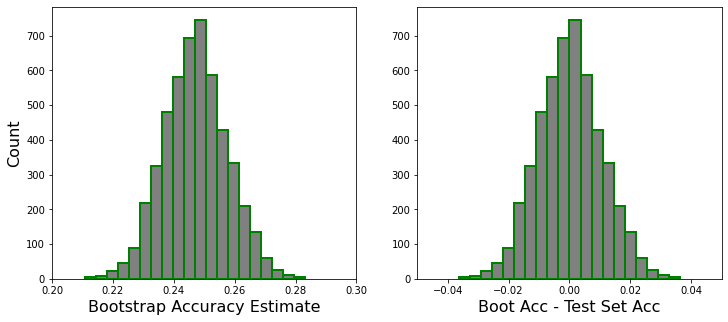

In [ ]:
#bootstrap accuracy plots for sincerity
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boot Acc - Test Set Acc', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(sin_bs_output_lda_acc.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.2,0.3])
axs[1].hist(sin_bs_output_lda_acc.iloc[:,0]-sin_test_lda_acc, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.05,0.05])

In [ ]:
print('The bootstrapped mean of LDA accuracy is:', np.mean(sin_bs_output_lda_acc)[0])

The bootstrapped mean of LDA accuracy is: 0.24708768242848905


In [ ]:
# The 95% confidence interval
CI_0 = np.quantile(sin_bs_output_lda_acc.iloc[:,0]-sin_test_lda_acc,np.array([0.025,0.975]))
left = sin_test_lda_acc - CI_0[1]
right = sin_test_lda_acc - CI_0[0]
print("The 95-percent confidence interval of the test set accuuracy for the LDA sincerity model is:",[left, right])

The 95-percent confidence interval of the test set accuuracy for the LDA sincerity model is: [0.2265032107413894, 0.26678342089900764]


## Sincerity (Rescaled OSR^2 & Baseline Comparisons)

In [ ]:
base_sin = 1 - (np.sum((sin_y_test - sin_y_train.value_counts().index[0])**2)/np.sum((sin_y_test - np.mean(sin_y_train))**2))
rm1_lr_sin = rescaled_OSR2_1(sin_lr, sin_y_train, sin_test.drop(columns = ['(1_1-2_1_o)_att','attr1_1','museums_diff','(3_1-pf_o)_att','tvsport_diff','masters_m','date_diff','tuition_o','imprelig_m']), 'sinc_o', 'lr')
rm2_lr_sin = rescaled_OSR2_2(sin_lr, sin_y_train, sin_test.drop(columns = ['(1_1-2_1_o)_att','attr1_1','museums_diff','(3_1-pf_o)_att','tvsport_diff','masters_m','date_diff','tuition_o','imprelig_m']), 'sinc_o', 'lr')
rm1_lda_sin = rescaled_OSR2_1(sin_lda, sin_y_train, sin_test, 'sinc_o', 'lda')
rm2_lda_sin = rescaled_OSR2_2(sin_lda, sin_y_train, sin_test, 'sinc_o', 'lda')
 
print('Models for Sincerity:')
print('No Rescale Bootstrapped Mean, Linear Regression OSR2 for Sincerity:', np.mean(sin_bs_output_lr)[0])
print('No Rescale Bootstrapped Mean, LDA Accuracy for Sincerity:', np.mean(sin_bs_output_lda_acc)[0])
print()
print('Rescaling Linear Regression Model before OSR2 Calculation:')
print('Rescale Method 1, Linear Regression Sincerity OSR2:', rm1_lr_sin)
print('Rescale Method 2, Linear Regression Sincerity OSR2:', rm2_lr_sin)
print()
print('BASELINE:')
print('Baseline OSR2:', base_sin)
print()
print('SINCERITY MODEL COMPARISONS:')
print('OSR2 difference between LR model and baseline:', np.amax(np.array([rm1_lr_sin, rm2_lr_sin, rm1_lda_sin, rm2_lda_sin, np.mean(sin_bs_output_lr)[0]])) - base_sin)
print('Accuracy difference for LDA and baseline:', np.mean(sin_bs_output_lda_acc)[0] - sin_y_train.value_counts().values[0]/np.sum(sin_y_train.value_counts()))

Models for Sincerity:
No Rescale Bootstrapped Mean, Linear Regression OSR2 for Sincerity: 0.05566328871978967
No Rescale Bootstrapped Mean, LDA Accuracy for Sincerity: 0.24708768242848905

Rescaling Linear Regression Model before OSR2 Calculation:
Rescale Method 1, Linear Regression Sincerity OSR2: -7.85916896679848
Rescale Method 2, Linear Regression Sincerity OSR2: -5.948579171435916

BASELINE:
Baseline OSR2: -0.008430644390108988

SINCERITY MODEL COMPARISONS:
OSR2 difference between LR model and baseline: 0.06409393310989867
Accuracy difference for LDA and baseline: 0.00515455350455854


## Intelligence (Linear Regression + LDA)
Make linear model for this trait, perform feature selection.
Bootstrap your model and report the mean and 95% CI for OSR^2.

Run LDA on this trait. Bootstrap this model and report the mean and 95% CI for accuracy. Calculate OSR^2 as well.

Calculate rescaled OSR^2 using the two methods above.

## Intelligence (Linear Regression - Feature Selection)

In [ ]:
inte_train = inte_X_train.copy()
inte_train['intel_o'] = inte_y_train
inte_train.head()

,gender,condtn,order,int_corr,samerace,age_o,mn_sat_o,tuition_o,income,exphappy_o,met_o,world_rank_o,masters_o,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,age_diff,income_diff,date_diff,go_out_diff,sports_diff,tvsport_diff,exercise_diff,dining_diff,museums_diff,art_diff,hiking_diff,gaming_diff,clubbing_diff,reading_diff,tv_diff,theater_diff,movies_diff,concerts_diff,music_diff,shopping_diff,yoga_diff,worldrank_diff,(3_1-pf_o)_att,(3_1-pf_o)_sinc,(3_1-pf_o)_fun,(3_1-pf_o)_intel,(3_1-pf_o)_amb,(1_1-2_1_o)_att,(1_1-2_1_o)_sinc,(1_1-2_1_o)_fun,(1_1-2_1_o)_intel,(1_1-2_1_o)_amb,(1_1-2_1_o)_shar,from_m,goal_m,imprace_m,imprelig_m,career_c_m,masters_m,intel_o
820,-0.984979,-2.276573,-0.328868,1.600201,-0.819524,0.166126,0.081581,0.095712,-0.091583,-0.309392,0.189693,-0.651660,2.526776,-1.024834,0.343429,-0.048345,0.427405,0.711414,0.487724,1.028135,0.598846,-0.482231,0.630148,-0.250311,-0.484409,-0.861744,-0.792903,-0.348690,-0.306966,-1.672676,0.514720,0.580088,0.350358,-0.547450,-1.216970,0.001336,-0.645696,-0.787261,-0.514229,-2.050035,-0.191847,0.032483,0.305499,-0.041020,-0.164303,0.797727,0.006708,0.069671,0.781754,-0.309568,-0.482420,-0.115216,-0.096417,-0.673649,-0.446043,-0.449572,-0.485342,-1.839424,6.0
4086,-0.984979,0.439192,1.680916,-0.054252,-0.819524,-0.388491,0.081581,-2.602266,-0.091583,0.844333,0.189693,0.915164,-0.395703,-0.509266,-0.229582,-0.193132,-0.082893,0.543733,0.965297,0.401691,0.046688,-0.482231,0.630148,-0.250311,-0.729227,0.004518,-1.598408,-2.043085,-1.234100,-0.842046,-0.277041,-0.563039,-0.003362,1.108214,-1.216970,1.247151,-1.626429,-2.001806,-1.281979,-0.776930,1.919175,-0.548965,-0.242844,1.088041,-1.184719,-0.159674,-0.919548,0.896297,1.116715,-1.289000,0.249930,0.816682,-0.096417,-0.673649,-0.446043,-0.449572,2.060100,0.543569,9.0
2359,1.015102,0.439192,0.401962,-1.046923,1.220042,0.443434,0.081581,0.095712,-0.091583,-0.886254,0.189693,-0.651660,-0.395703,-0.485206,0.476654,-0.251046,0.189266,0.535349,-0.048749,-0.015938,-0.238760,0.500920,-1.317538,1.574164,1.474133,0.004518,0.012603,-0.687569,-0.616010,1.096089,-0.277041,2.294779,-0.710802,-1.099338,-0.309682,-0.413936,-0.318785,-0.787261,0.509439,-0.522310,-0.191847,0.672907,0.123175,-0.423288,0.662235,-1.176115,0.065756,0.033506,0.370868,-0.130006,0.127872,-0.540394,-0.096417,1.484236,-0.446043,-0.449572,-0.485342,0.543569,7.0
8359,-0.984979,0.439192,1.498208,-0.054252,1.220042,0.998051,0.081581,0.095712,0.402106,1.421195,0.189693,0.915164,-0.395703,-0.165554,0.343429,-0.048345,-0.423092,-0.965395,1.283679,1.445764,-0.337857,0.009344,-1.317538,1.313524,0.494862,0.293271,1.220861,-1.365327,-2.161233,0.819213,-0.277041,0.008525,-2.125684,-0.547450,-2.124258,-0.829208,-1.953340,-0.382413,1.021273,-0.267689,1.982549,-0.964285,1.265100,-1.170081,0.127245,0.797727,-0.109074,0.586312,-1.562974,0.452212,-0.482420,1.166144,-0.096417,1.484236,-0.446043,-0.449572,-0.485342,0.543569,5.0
3800,-0.984979,0.439192,1.680916,0.640618,-0.819524,-0.665800,-0.002899,-1.413061,2.563324,0.267470,0.189693,0.915164,-0.395703,-0.595194,0.343429,-0.048345,0.427405,0.711414,-0.308230,-0.433567,-1.902352,-1.465383,-0.019081,-0.771590,-0.239591,0.293271,-0.792903,-1.026448,-0.925055,0.265460,-0.013121,-1.991948,0.350358,1.384158,-0.914540,-0.413936,0.008126,0.427284,1.021273,0.241553,1.818650,-0.798157,0.990928,-0.524903,-0.164303,0.159460,0.759290,0.586312,-0.446437,-1.180174,-1.092712,0.583708,-0.096417,-0.673649,-0.446043,-0.449572,2.060100,0.543569,6.0


In [ ]:
# Fit linear model

# We must add an intercept as the standard model doesn't automatically fit one
inte_X_train = sm.add_constant(inte_X_train)

# Fit the data to the model
inte_model = sm.OLS(inte_y_train, inte_X_train).fit() #ordinary least square
print(inte_model.summary())

                            OLS Regression Results                            
Dep. Variable:                intel_o   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     11.69
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          8.48e-101
Time:                        23:11:37   Log-Likelihood:                -12296.
No. Observations:                6839   AIC:                         2.471e+04
Df Residuals:                    6780   BIC:                         2.511e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3800      0.01

In [ ]:
# Check VIF values

inte_cols = ['gender', 'condtn', 'order', 'int_corr', 'samerace', 'age_o',
       'mn_sat_o', 'tuition_o', 'income', 'exphappy_o', 'met_o',
       'world_rank_o', 'masters_o', 'attr1_1', 'sinc1_1', 'intel1_1',
       'fun1_1', 'amb1_1', 'shar1_1', 'age_diff', 'income_diff',
       'date_diff', 'go_out_diff', 'sports_diff', 'tvsport_diff',
       'exercise_diff', 'dining_diff', 'museums_diff', 'art_diff',
       'hiking_diff', 'gaming_diff', 'clubbing_diff', 'reading_diff',
       'tv_diff', 'theater_diff', 'movies_diff', 'concerts_diff',
       'music_diff', 'shopping_diff', 'yoga_diff', 'worldrank_diff',
       '(3_1-pf_o)_att', '(3_1-pf_o)_sinc', '(3_1-pf_o)_fun',
       '(3_1-pf_o)_intel', '(3_1-pf_o)_amb', '(1_1-2_1_o)_att',
       '(1_1-2_1_o)_sinc', '(1_1-2_1_o)_fun', '(1_1-2_1_o)_intel',
       '(1_1-2_1_o)_amb', '(1_1-2_1_o)_shar', 'from_m', 'goal_m',
       'imprace_m', 'imprelig_m', 'career_c_m', 'masters_m']
VIF(inte_X_train, inte_cols).sort_values(ascending=False)

(1_1-2_1_o)_att      93.541488
attr1_1              79.267005
(1_1-2_1_o)_sinc     30.849726
sinc1_1              29.877355
intel1_1             29.774692
(1_1-2_1_o)_intel    28.024515
(1_1-2_1_o)_fun      25.820939
(1_1-2_1_o)_shar     24.528959
shar1_1              24.521743
(1_1-2_1_o)_amb      21.663313
fun1_1               21.177219
amb1_1               20.928744
museums_diff          4.528814
art_diff              4.163105
(3_1-pf_o)_att        3.587513
gender                2.992265
concerts_diff         2.326093
theater_diff          2.299306
income_diff           2.196381
age_diff              2.139027
income                2.121588
shopping_diff         2.119148
age_o                 2.094273
sports_diff           2.092035
(3_1-pf_o)_amb        1.996868
(3_1-pf_o)_intel      1.900972
music_diff            1.897973
(3_1-pf_o)_sinc       1.894453
world_rank_o          1.886049
tv_diff               1.846294
worldrank_diff        1.789790
tuition_o             1.764028
mn_sat_o

In [ ]:
# Drop the column with highest VIF

inte_X_train = inte_X_train.drop(columns= ['(1_1-2_1_o)_att'])
inte_X_test = inte_X_test.drop(columns= ['(1_1-2_1_o)_att'])

In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
inte_X_train = sm.add_constant(inte_X_train)

# Fit the data to the model
inte_model2 = sm.OLS(inte_y_train, inte_X_train).fit() #ordinary least square
print(inte_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                intel_o   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     11.86
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          5.72e-101
Time:                        23:11:40   Log-Likelihood:                -12297.
No. Observations:                6839   AIC:                         2.471e+04
Df Residuals:                    6781   BIC:                         2.511e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3800      0.01

In [ ]:
# Check VIF values again

inte_cols.remove('(1_1-2_1_o)_att')
VIF(inte_X_train, inte_cols).sort_values(ascending=False)

attr1_1              36.121562
intel1_1             15.213376
sinc1_1              14.923888
shar1_1              12.572099
fun1_1               10.942565
amb1_1               10.256794
museums_diff          4.528775
art_diff              4.158113
(3_1-pf_o)_att        3.573906
gender                2.958109
(1_1-2_1_o)_sinc      2.792293
(1_1-2_1_o)_intel     2.734015
(1_1-2_1_o)_shar      2.567960
concerts_diff         2.326023
(1_1-2_1_o)_fun       2.314390
theater_diff          2.298966
income_diff           2.191026
age_diff              2.138976
shopping_diff         2.118851
income                2.118341
sports_diff           2.091390
age_o                 2.089319
(3_1-pf_o)_amb        1.990651
(1_1-2_1_o)_amb       1.990249
(3_1-pf_o)_intel      1.900062
music_diff            1.897190
(3_1-pf_o)_sinc       1.894370
world_rank_o          1.875425
tv_diff               1.844494
worldrank_diff        1.789757
tuition_o             1.758634
mn_sat_o              1.751497
tvsport_

In [ ]:
# Drop the column with highest VIF

inte_X_train = inte_X_train.drop(columns= ['attr1_1'])
inte_X_test = inte_X_test.drop(columns= ['attr1_1'])

In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
inte_X_train = sm.add_constant(inte_X_train)

# Fit the data to the model
inte_model2 = sm.OLS(inte_y_train, inte_X_train).fit() #ordinary least square
print(inte_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                intel_o   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     12.06
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          2.36e-101
Time:                        23:11:42   Log-Likelihood:                -12297.
No. Observations:                6839   AIC:                         2.471e+04
Df Residuals:                    6782   BIC:                         2.510e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3800      0.01

In [ ]:
# Check VIF values again

inte_cols.remove('attr1_1')
VIF(inte_X_train, inte_cols).sort_values(ascending=False)

museums_diff         4.528774
art_diff             4.157250
(3_1-pf_o)_att       3.573902
gender               2.936946
intel1_1             2.812037
(1_1-2_1_o)_sinc     2.791725
(1_1-2_1_o)_intel    2.733193
sinc1_1              2.600995
(1_1-2_1_o)_shar     2.565174
shar1_1              2.364819
concerts_diff        2.320016
(1_1-2_1_o)_fun      2.314388
theater_diff         2.295093
amb1_1               2.227525
fun1_1               2.226583
income_diff          2.190097
age_diff             2.138975
income               2.118189
shopping_diff        2.113484
sports_diff          2.089885
age_o                2.088097
(3_1-pf_o)_amb       1.990347
(1_1-2_1_o)_amb      1.990220
(3_1-pf_o)_intel     1.899482
(3_1-pf_o)_sinc      1.894264
music_diff           1.892325
world_rank_o         1.874698
tv_diff              1.844490
worldrank_diff       1.789498
tuition_o            1.758633
mn_sat_o             1.751477
tvsport_diff         1.743310
masters_o            1.740450
movies_dif

In [ ]:
# Remove column with highest p value

inte_X_train = inte_X_train.drop(columns= ['income'])
inte_X_test = inte_X_test.drop(columns= ['income'])

In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
inte_X_train = sm.add_constant(inte_X_train)

# Fit the data to the model
inte_lr = sm.OLS(inte_y_train, inte_X_train).fit() #ordinary least square
print(inte_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                intel_o   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     12.28
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          6.68e-102
Time:                        23:11:44   Log-Likelihood:                -12297.
No. Observations:                6839   AIC:                         2.471e+04
Df Residuals:                    6783   BIC:                         2.509e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3800      0.01

In [ ]:
# Remove column with highest p value
inte_X_train = inte_X_train.drop(columns= ['(1_1-2_1_o)_amb'])
inte_X_test = inte_X_test.drop(columns= ['(1_1-2_1_o)_amb'])

In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
inte_X_train = sm.add_constant(inte_X_train)

# Fit the data to the model
inte_lr = sm.OLS(inte_y_train, inte_X_train).fit() #ordinary least square
print(inte_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                intel_o   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     12.51
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          1.89e-102
Time:                        23:11:44   Log-Likelihood:                -12297.
No. Observations:                6839   AIC:                         2.470e+04
Df Residuals:                    6784   BIC:                         2.508e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3800      0.01

In [ ]:
# Remove column with highest p value

inte_X_train = inte_X_train.drop(columns= ['gender'])
inte_X_test = inte_X_test.drop(columns= ['gender'])

In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
inte_X_train = sm.add_constant(inte_X_train)

# Fit the data to the model
inte_lr = sm.OLS(inte_y_train, inte_X_train).fit() #ordinary least square
print(inte_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                intel_o   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     12.75
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          5.30e-103
Time:                        23:11:44   Log-Likelihood:                -12297.
No. Observations:                6839   AIC:                         2.470e+04
Df Residuals:                    6785   BIC:                         2.507e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3800      0.01

In [ ]:
# Remove column with highest p value

inte_X_train = inte_X_train.drop(columns= ['sports_diff'])
inte_X_test = inte_X_test.drop(columns= ['sports_diff'])

In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
inte_X_train = sm.add_constant(inte_X_train)

# Fit the data to the model
inte_lr = sm.OLS(inte_y_train, inte_X_train).fit() #ordinary least square
print(inte_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                intel_o   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     13.00
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          1.48e-103
Time:                        23:11:45   Log-Likelihood:                -12297.
No. Observations:                6839   AIC:                         2.470e+04
Df Residuals:                    6786   BIC:                         2.506e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3800      0.01

In [ ]:
# Remove column with highest p value

inte_X_train = inte_X_train.drop(columns= ['from_m'])
inte_X_test = inte_X_test.drop(columns= ['from_m'])

In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
inte_X_train = sm.add_constant(inte_X_train)

# Fit the data to the model
inte_lr = sm.OLS(inte_y_train, inte_X_train).fit() #ordinary least square
print(inte_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                intel_o   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     13.25
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          4.14e-104
Time:                        23:11:45   Log-Likelihood:                -12297.
No. Observations:                6839   AIC:                         2.470e+04
Df Residuals:                    6787   BIC:                         2.505e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3800      0.01

In [ ]:
# Remove column with highest p value

inte_X_train = inte_X_train.drop(columns= ['amb1_1'])
inte_X_test = inte_X_test.drop(columns= ['amb1_1'])

In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
inte_X_train = sm.add_constant(inte_X_train)

# Fit the data to the model
inte_lr = sm.OLS(inte_y_train, inte_X_train).fit() #ordinary least square
print(inte_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                intel_o   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     13.52
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          1.17e-104
Time:                        23:11:45   Log-Likelihood:                -12297.
No. Observations:                6839   AIC:                         2.470e+04
Df Residuals:                    6788   BIC:                         2.505e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3800      0.01

In [ ]:
# Remove column with highest p value

inte_X_train = inte_X_train.drop(columns= ['imprace_m'])
inte_X_test = inte_X_test.drop(columns= ['imprace_m'])

In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
inte_X_train = sm.add_constant(inte_X_train)

# Fit the data to the model
inte_lr = sm.OLS(inte_y_train, inte_X_train).fit() #ordinary least square
print(inte_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                intel_o   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     13.79
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          3.30e-105
Time:                        23:11:45   Log-Likelihood:                -12298.
No. Observations:                6839   AIC:                         2.470e+04
Df Residuals:                    6789   BIC:                         2.504e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3800      0.01

In [ ]:
# Recombine training and test sets without removed columns

inte_train = inte_X_train.copy()
inte_train['intel_o'] = inte_y_train 

inte_test = inte_X_test.copy()
inte_test['intel_o'] = inte_y_test

In [ ]:
# Check OSR^2 with test set

inte_OSR2 = OSR_2(inte_lr, inte_y_train, inte_test, 'intel_o')
inte_OSR2

-44.96003325129975

## Intelligence (Linear Regression - Bootstrap)

In [ ]:
inte_X_test2 = sm.add_constant(inte_X_test)

In [ ]:
# compute out-of-sample R-squared using the test set
def OSR2(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

In [ ]:
# Check OSR^2 with test set
test_OSR2 = OSR2(inte_lr.predict(inte_X_test2), inte_y_test, inte_y_train)
test_OSR2

0.06353026305261955

In [ ]:
# Bootstrap linear regression model

inte_lr_output = bootstrap_validation(inte_X_test2, inte_y_test, inte_y_train, inte_lr, [OSR2])

(500, 1)


(array([ 5.,  4., 11., 17., 26., 23., 24., 43., 45., 47., 54., 58., 59.,
        33., 16., 16.,  8.,  6.,  3.,  2.]),
 array([44.98757252, 44.99121043, 44.99484834, 44.99848626, 45.00212417,
        45.00576208, 45.00939999, 45.01303791, 45.01667582, 45.02031373,
        45.02395164, 45.02758956, 45.03122747, 45.03486538, 45.03850329,
        45.0421412 , 45.04577912, 45.04941703, 45.05305494, 45.05669285,
        45.06033077]),
 <a list of 20 Patch objects>)

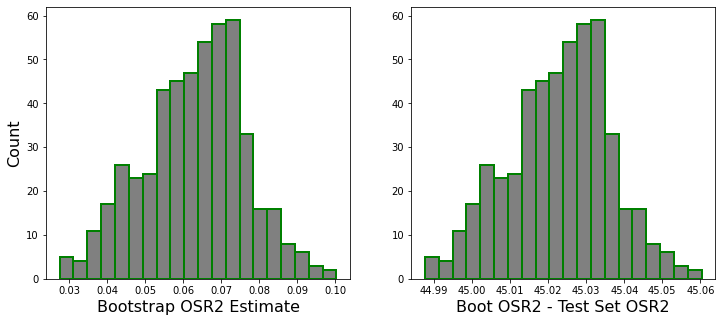

In [ ]:
#bootstrap plots
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap OSR2 Estimate', fontsize=16)
axs[1].set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(inte_lr_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(inte_lr_output.iloc[:,0]-inte_OSR2, bins=20,edgecolor='green', linewidth=2,color = "grey")

In [ ]:
# Mean of bootstrapped estimate

print("Mean of Linear Regression estimates: %s" % np.mean(inte_lr_output)[0])

Mean of Linear Regression estimates: 0.06306201599846706


In [ ]:
inte_lr_CI = np.quantile(inte_lr_output.iloc[:,0],np.array([0.025,0.975]))

print('Mean: %.4f, Std: %.4f'%(statistics.mean(inte_lr_CI), statistics.stdev(inte_lr_CI)))
print("The 95-percent confidence interval of the test set OSR2 for the linear regression intelligence model is %s" % inte_lr_CI)

Mean: 0.0628, Std: 0.0362
The 95-percent confidence interval of the test set OSR2 for the linear regression intelligence model is [0.03717071 0.08842216]


## Intelligence (LDA - Train Model + Bootstrap Accuracy)

In [ ]:
# Change value type to be used for LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

inte_y_train2 = inte_y_train.astype(int)
inte_y_test2 = inte_y_test.astype(int)

inte_X_train2 = inte_X_train.drop(columns= ['const'])

In [ ]:
# Train LDA model

inte_lda = LinearDiscriminantAnalysis()
inte_lda.fit(sm.add_constant(inte_X_train2), inte_y_train2)

LinearDiscriminantAnalysis()

In [ ]:
inte_lda_pred = inte_lda.predict(sm.add_constant(inte_X_test))
cm_inte_lda = confusion_matrix(inte_y_test2, inte_lda_pred)
inte_lda_acc = accuracy_score(inte_y_test2, inte_lda_pred)

print ("Confusion Matrix: \n", cm_inte_lda)
print ("\nLDA Test Accuracy:", inte_lda_acc)

Confusion Matrix: 
 [[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   3   1   0   1]
 [  0   0   5   0   0   1   0   2   0   0   0]
 [  0   0   1   0   0   0   1   6   6   0   0]
 [  0   0   0   1   0   0   0  16  19   2   0]
 [  0   0   1   0   0   7   7  54  49   5   1]
 [  0   0   0   0   0   2  18 114 118   4   4]
 [  2   0   2   0   0   7   8 168 204   8  11]
 [  0   0   3   0   0   4  10 156 257   9  20]
 [  0   0   0   0   0   3   3  79 146   8  14]
 [  0   1   0   0   0   1   1  37  73   8  16]]

LDA Test Accuracy: 0.2801169590643275


In [ ]:
# Bootstrap linear regression model

inte_lda_output = bootstrap_validation(sm.add_constant(inte_X_test), inte_y_test2, inte_y_train2, inte_lda, [calc_acc])

(500, 1)


(-0.05, 0.05)

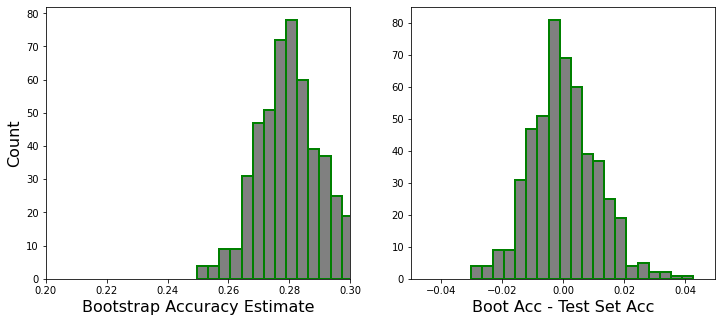

In [ ]:
#bootstrap accuracy plots for sincerity
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boot Acc - Test Set Acc', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(inte_lda_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.2,0.3])
axs[1].hist(inte_lda_output.iloc[:,0]-inte_lda_acc, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.05,0.05])

In [ ]:
# Mean of bootstrapped estimate

print("Bootsrapped Mean of LDA accuracy estimates: %s" % np.mean(inte_lda_output)[0])

Bootsrapped Mean of LDA accuracy estimates: 0.28037777777777756


In [ ]:
inte_lda_CI = np.quantile(inte_lda_output.iloc[:,0],np.array([0.025,0.975]))

print('Mean: %.4f, Std: %.4f'%(statistics.mean(inte_lda_CI), statistics.stdev(inte_lda_CI)))
print("The 95-percent confidence interval of the test set accuuracy for the LDA intelligence model is %s" % inte_lda_CI)

Mean: 0.2811, Std: 0.0304
The 95-percent confidence interval of the test set accuuracy for the LDA intelligence model is [0.25964912 0.3026462 ]


## Intelligence (Rescaled OSR^2 & Baseline Comparisons)

In [ ]:
base_inte = 1 - (np.sum((inte_y_test - inte_y_train.value_counts().index[0])**2)/np.sum((inte_y_test - np.mean(inte_y_train))**2))
rm1_lr_inte = rescaled_OSR2_1(inte_lr, inte_y_train, inte_test, 'intel_o', 'lr')
rm2_lr_inte = rescaled_OSR2_2(inte_lr, inte_y_train, inte_test, 'intel_o', 'lr')
rm1_lda_inte = rescaled_OSR2_1(inte_lda, inte_y_train, inte_test_2.drop(columns= ['(1_1-2_1_o)_att', 'attr1_1', 'income', '(1_1-2_1_o)_amb', 'gender', 'sports_diff', 'from_m', 'amb1_1', 'imprace_m']), 'intel_o', 'lda')
rm2_lda_inte = rescaled_OSR2_2(inte_lda, inte_y_train, inte_test_2.drop(columns= ['(1_1-2_1_o)_att', 'attr1_1', 'income', '(1_1-2_1_o)_amb', 'gender', 'sports_diff', 'from_m', 'amb1_1', 'imprace_m']), 'intel_o', 'lda')
 
print('Models for INTELLIGENCE:')
print('No Rescale Bootstrapped Mean, Linear Regression OSR2 for INTELLIGENCE:', np.mean(inte_lr_output)[0])
print('No Rescale Bootstrapped Mean, LDA Accuracy for INTELLIGENCE:', np.mean(inte_lda_output)[0])
print()
print('Rescaling Linear Regression Model before OSR2 Calculation:')
print('Rescale Method 1, Linear Regression INTELLIGENCE OSR2:', rm1_lr_inte)
print('Rescale Method 2, Linear Regression INTELLIGENCE OSR2:', rm2_lr_inte)
print()
print('BASELINE:')
print('Baseline OSR2:', base_inte)
print()
print('INTELLIGENCE MODEL COMPARISONS:')
print('OSR2 difference between LR model and baseline:', np.amax(np.array([rm1_lr_inte, rm2_lr_inte, rm1_lda_inte, rm2_lda_inte, np.mean(inte_lr_output)[0]])) - base_inte)
print('Accuracy difference for LDA and baseline:', np.mean(inte_lda_output)[0] - inte_y_train.value_counts().values[0]/np.sum(inte_y_train.value_counts()))

Models for INTELLIGENCE:
No Rescale Bootstrapped Mean, Linear Regression OSR2 for INTELLIGENCE: 0.06306201599846706
No Rescale Bootstrapped Mean, LDA Accuracy for INTELLIGENCE: 0.28037777777777756

Rescaling Linear Regression Model before OSR2 Calculation:
Rescale Method 1, Linear Regression INTELLIGENCE OSR2: -9.588281198901678
Rescale Method 2, Linear Regression INTELLIGENCE OSR2: -3.859513559592145

BASELINE:
Baseline OSR2: -0.16399769023522182

INTELLIGENCE MODEL COMPARISONS:
OSR2 difference between LR model and baseline: 0.22705970623368887
Accuracy difference for LDA and baseline: 0.010455274487822908


## Fun (Linear Regression + LDA)

Make linear model for this trait, perform feature selection.
Bootstrap your model and report the mean and 95% CI for OSR^2.

Run LDA on this trait. Bootstrap this model and report the mean and 95% CI for accuracy. Calculate OSR^2 as well.

Calculate rescaled OSR^2 using the two methods above.

## Fun (Linear Regression - Feature Selection)

In [ ]:
from sklearn.linear_model import LinearRegression
fun_train = fun_X_train.copy()
fun_train['fun_o'] = fun_y_train
fun_train.head()



,gender,condtn,order,int_corr,samerace,age_o,mn_sat_o,tuition_o,income,exphappy_o,met_o,world_rank_o,masters_o,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,age_diff,income_diff,date_diff,go_out_diff,sports_diff,tvsport_diff,exercise_diff,dining_diff,museums_diff,art_diff,hiking_diff,gaming_diff,clubbing_diff,reading_diff,tv_diff,theater_diff,movies_diff,concerts_diff,music_diff,shopping_diff,yoga_diff,worldrank_diff,(3_1-pf_o)_att,(3_1-pf_o)_sinc,(3_1-pf_o)_fun,(3_1-pf_o)_intel,(3_1-pf_o)_amb,(1_1-2_1_o)_att,(1_1-2_1_o)_sinc,(1_1-2_1_o)_fun,(1_1-2_1_o)_intel,(1_1-2_1_o)_amb,(1_1-2_1_o)_shar,from_m,goal_m,imprace_m,imprelig_m,career_c_m,masters_m,fun_o
6954,-0.991723,-2.255038,-0.149328,0.233881,-0.813387,-0.672881,1.333911,1.099975,0.658140,0.841766,0.172114,0.908585,2.514856,-0.600697,1.062289,-0.042256,-0.418781,-0.131968,0.492035,-0.228575,-0.523066,-2.457600,-0.662995,1.324276,0.006820,0.580234,-0.399607,-0.355632,-1.247353,-0.858932,-0.795239,0.000465,-1.779372,-1.373462,-0.322525,-1.636807,-0.331758,-1.195244,-0.774410,-1.286902,1.958558,-0.228434,1.545946,-0.524867,-2.188444,0.008084,-0.408838,1.822972,1.364387,-2.811072,-1.097606,1.391160,-0.095932,-0.677990,-0.451909,-0.457326,-0.481827,-1.852308,5.0
8929,1.008198,0.443386,-0.332301,-0.293041,-0.813387,-1.236699,0.074535,0.097131,0.301111,1.419254,0.172114,0.908585,-0.397579,0.085268,-0.516057,-0.187872,-0.248665,-0.131968,0.967695,-0.228575,-0.267093,0.997576,-0.020509,0.800026,1.733087,0.290181,-0.399607,-1.376858,0.607510,1.096346,-0.271043,-0.573890,-1.779372,-0.266190,0.586733,0.407999,0.323659,0.412765,0.249252,-0.779486,-0.196424,0.106404,-0.522898,0.115593,1.293450,0.490224,-0.524354,-0.033636,0.801025,0.356241,0.119167,-0.221040,-0.095932,-0.677990,-0.451909,-0.457326,-0.481827,0.539787,9.0
2304,1.008198,0.443386,1.131482,0.629072,1.229246,1.300478,0.074535,0.097131,0.255770,-0.313209,0.172114,-0.658143,-0.397579,-0.292012,-0.523231,-0.246118,-0.201033,0.914727,0.694983,1.679816,0.439322,-0.483214,-0.020509,-1.034851,-1.966057,-1.450136,-0.399607,-1.717267,-1.556497,-0.020956,-0.271043,0.000465,0.344005,-1.096644,-1.534870,-0.409924,-0.331758,-1.195244,-0.262579,2.011302,-0.196424,0.776080,-0.522898,-0.524867,-0.157339,-0.956198,0.087880,-0.554518,0.269212,-0.233535,0.274914,0.156675,-0.095932,-0.677990,-0.451909,-0.457326,2.075128,0.539787,8.0
6168,1.008198,0.443386,2.046347,0.398544,1.229246,1.864296,-1.727672,-0.635368,-0.119396,0.264278,0.172114,0.908585,-0.397579,0.256760,-0.372571,-0.042256,0.431800,-0.131968,-0.300731,0.831642,-0.391599,-0.483214,-0.020509,-1.821226,-0.486399,0.000128,1.210903,1.006004,1.225797,1.375671,-0.008945,-0.573890,-0.009891,0.287446,1.495992,-0.000963,0.979076,0.412765,0.249252,1.250178,1.910670,-0.312143,-0.522898,-0.524867,1.583608,-1.599052,-0.986417,0.585233,-1.001732,-0.626718,0.727554,1.160846,-0.095932,-0.677990,-0.451909,-0.457326,2.075128,-1.852308,6.0
1179,-0.991723,0.443386,1.314455,-0.260109,1.229246,-0.109064,0.074535,0.097131,-1.508353,0.264278,0.172114,-0.658143,2.514856,-0.171969,1.062289,-0.770334,-0.418781,0.701388,-0.300731,-0.864706,1.731157,-0.976810,-1.947967,1.586401,0.993258,1.160339,-0.399607,-0.696041,-0.629065,-0.020956,0.253153,0.287642,-0.009891,1.117900,-0.322525,0.407999,0.979076,0.010763,0.249252,-0.018362,-0.196424,-1.484076,1.821792,1.396513,-0.012260,0.329511,-0.697627,1.616682,-0.438371,-0.080630,0.119167,0.009274,-0.095932,1.474731,-0.451909,-0.457326,-0.481827,0.539787,8.0


In [ ]:
fun_cols = ['gender', 'condtn', 'order', 'int_corr', 'samerace', 'age_o',
       'mn_sat_o', 'tuition_o', 'income', 'exphappy_o', 'met_o', 'fun1_1',
       'world_rank_o', 'masters_o', 'attr1_1', 'sinc1_1', 'intel1_1',
       'amb1_1', 'shar1_1', 'age_diff', 'income_diff',
       'date_diff', 'go_out_diff', 'sports_diff', 'tvsport_diff',
       'exercise_diff', 'dining_diff', 'museums_diff', 'art_diff',
       'hiking_diff', 'gaming_diff', 'clubbing_diff', 'reading_diff',
       'tv_diff', 'theater_diff', 'movies_diff', 'concerts_diff',
       'music_diff', 'shopping_diff', 'yoga_diff', 'worldrank_diff',
       '(3_1-pf_o)_att', '(3_1-pf_o)_sinc', '(3_1-pf_o)_fun',
       '(3_1-pf_o)_intel', '(3_1-pf_o)_amb', '(1_1-2_1_o)_att',
       '(1_1-2_1_o)_sinc', '(1_1-2_1_o)_fun', '(1_1-2_1_o)_intel',
       '(1_1-2_1_o)_amb', '(1_1-2_1_o)_shar', 'from_m', 'goal_m',
       'imprace_m', 'imprelig_m', 'career_c_m', 'masters_m']
VIF(fun_X_train, fun_cols).sort_values(ascending=False)

(1_1-2_1_o)_att      93.323556
attr1_1              77.057432
(1_1-2_1_o)_sinc     30.864469
sinc1_1              28.960588
intel1_1             28.700260
(1_1-2_1_o)_intel    27.693427
(1_1-2_1_o)_fun      25.176605
(1_1-2_1_o)_shar     24.970671
shar1_1              24.116997
(1_1-2_1_o)_amb      21.601501
fun1_1               20.607372
amb1_1               20.330461
museums_diff          4.558421
art_diff              4.192226
(3_1-pf_o)_att        3.510825
gender                2.965416
concerts_diff         2.321921
theater_diff          2.304156
income_diff           2.148007
age_diff              2.090670
shopping_diff         2.076787
income                2.075251
sports_diff           2.068414
age_o                 2.049487
(3_1-pf_o)_amb        1.938342
music_diff            1.921185
world_rank_o          1.901774
(3_1-pf_o)_intel      1.898237
(3_1-pf_o)_sinc       1.876609
worldrank_diff        1.803230
tv_diff               1.800527
tuition_o             1.757068
movies_d

In [ ]:
fun_X_train

,gender,condtn,order,int_corr,samerace,age_o,mn_sat_o,tuition_o,income,exphappy_o,met_o,world_rank_o,masters_o,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,age_diff,income_diff,date_diff,go_out_diff,sports_diff,tvsport_diff,exercise_diff,dining_diff,museums_diff,art_diff,hiking_diff,gaming_diff,clubbing_diff,reading_diff,tv_diff,theater_diff,movies_diff,concerts_diff,music_diff,shopping_diff,yoga_diff,worldrank_diff,(3_1-pf_o)_att,(3_1-pf_o)_sinc,(3_1-pf_o)_fun,(3_1-pf_o)_intel,(3_1-pf_o)_amb,(1_1-2_1_o)_att,(1_1-2_1_o)_sinc,(1_1-2_1_o)_fun,(1_1-2_1_o)_intel,(1_1-2_1_o)_amb,(1_1-2_1_o)_shar,from_m,goal_m,imprace_m,imprelig_m,career_c_m,masters_m
6954,-0.991723,-2.255038,-0.149328,0.233881,-0.813387,-0.672881,1.333911,1.099975,0.658140,0.841766,0.172114,0.908585,2.514856,-0.600697,1.062289,-0.042256,-0.418781,-0.131968,0.492035,-0.228575,-0.523066,-2.457600,-0.662995,1.324276,0.006820,0.580234,-0.399607,-0.355632,-1.247353,-0.858932,-0.795239,0.000465,-1.779372,-1.373462,-0.322525,-1.636807,-0.331758,-1.195244,-0.774410,-1.286902,1.958558,-0.228434,1.545946,-0.524867,-2.188444,0.008084,-0.408838,1.822972,1.364387,-2.811072,-1.097606,1.391160,-0.095932,-0.677990,-0.451909,-0.457326,-0.481827,-1.852308
8929,1.008198,0.443386,-0.332301,-0.293041,-0.813387,-1.236699,0.074535,0.097131,0.301111,1.419254,0.172114,0.908585,-0.397579,0.085268,-0.516057,-0.187872,-0.248665,-0.131968,0.967695,-0.228575,-0.267093,0.997576,-0.020509,0.800026,1.733087,0.290181,-0.399607,-1.376858,0.607510,1.096346,-0.271043,-0.573890,-1.779372,-0.266190,0.586733,0.407999,0.323659,0.412765,0.249252,-0.779486,-0.196424,0.106404,-0.522898,0.115593,1.293450,0.490224,-0.524354,-0.033636,0.801025,0.356241,0.119167,-0.221040,-0.095932,-0.677990,-0.451909,-0.457326,-0.481827,0.539787
2304,1.008198,0.443386,1.131482,0.629072,1.229246,1.300478,0.074535,0.097131,0.255770,-0.313209,0.172114,-0.658143,-0.397579,-0.292012,-0.523231,-0.246118,-0.201033,0.914727,0.694983,1.679816,0.439322,-0.483214,-0.020509,-1.034851,-1.966057,-1.450136,-0.399607,-1.717267,-1.556497,-0.020956,-0.271043,0.000465,0.344005,-1.096644,-1.534870,-0.409924,-0.331758,-1.195244,-0.262579,2.011302,-0.196424,0.776080,-0.522898,-0.524867,-0.157339,-0.956198,0.087880,-0.554518,0.269212,-0.233535,0.274914,0.156675,-0.095932,-0.677990,-0.451909,-0.457326,2.075128,0.539787
6168,1.008198,0.443386,2.046347,0.398544,1.229246,1.864296,-1.727672,-0.635368,-0.119396,0.264278,0.172114,0.908585,-0.397579,0.256760,-0.372571,-0.042256,0.431800,-0.131968,-0.300731,0.831642,-0.391599,-0.483214,-0.020509,-1.821226,-0.486399,0.000128,1.210903,1.006004,1.225797,1.375671,-0.008945,-0.573890,-0.009891,0.287446,1.495992,-0.000963,0.979076,0.412765,0.249252,1.250178,1.910670,-0.312143,-0.522898,-0.524867,1.583608,-1.599052,-0.986417,0.585233,-1.001732,-0.626718,0.727554,1.160846,-0.095932,-0.677990,-0.451909,-0.457326,2.075128,-1.852308
1179,-0.991723,0.443386,1.314455,-0.260109,1.229246,-0.109064,0.074535,0.097131,-1.508353,0.264278,0.172114,-0.658143,2.514856,-0.171969,1.062289,-0.770334,-0.418781,0.701388,-0.300731,-0.864706,1.731157,-0.976810,-1.947967,1.586401,0.993258,1.160339,-0.399607,-0.696041,-0.629065,-0.020956,0.253153,0.287642,-0.009891,1.117900,-0.322525,0.407999,0.979076,0.010763,0.249252,-0.018362,-0.196424,-1.484076,1.821792,1.396513,-0.012260,0.329511,-0.697627,1.616682,-0.438371,-0.080630,0.119167,0.009274,-0.095932,1.474731,-0.451909,-0.457326,-0.481827,0.539787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,-0.991723,0.443386,0.765536,-0.095445,-0.813387,0.736661,0.074535,-1.866160,0.108432,0.264278,0.172114,0.908585,-0.397579,-0.343460,0.201373,-0.624718,-0.418781,0.701388,0.809142,1.043685,-0.128951,0.010383,-0.020509,1.848526,0.253430,0.580234,0.003021,-0.696041,-0.629065,-0.300281,1.563643,0.861997,-2.48716

In [ ]:
# Drop the column with very high VIF

fun_X_train = fun_X_train.drop(columns= ['(1_1-2_1_o)_att'])
fun_X_test= fun_X_test.drop(columns= ['(1_1-2_1_o)_att'])

In [ ]:
fun_X_train = sm.add_constant(fun_X_train)
fun_model2 = sm.OLS(fun_y_train, fun_X_train).fit()

In [ ]:
print(fun_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  fun_o   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     10.94
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           2.40e-91
Time:                        23:11:54   Log-Likelihood:                -13922.
No. Observations:                6798   AIC:                         2.796e+04
Df Residuals:                    6740   BIC:                         2.836e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.3748      0.02

In [ ]:
#Check VIF values again
fun_cols = fun_X_train.drop(columns = ['const']).columns.to_list()

VIF(fun_X_train, fun_cols).sort_values(ascending=False)

attr1_1              34.034627
intel1_1             14.376196
sinc1_1              14.030403
shar1_1              12.082781
fun1_1               10.344490
amb1_1                9.675734
museums_diff          4.558316
art_diff              4.187856
(3_1-pf_o)_att        3.499852
gender                2.930358
(1_1-2_1_o)_sinc      2.790377
(1_1-2_1_o)_intel     2.709186
(1_1-2_1_o)_shar      2.614627
concerts_diff         2.321634
theater_diff          2.304143
(1_1-2_1_o)_fun       2.276835
income_diff           2.142464
age_diff              2.090607
shopping_diff         2.076781
income                2.072077
sports_diff           2.067187
age_o                 2.046327
(1_1-2_1_o)_amb       1.993502
(3_1-pf_o)_amb        1.931128
music_diff            1.920812
(3_1-pf_o)_intel      1.895623
world_rank_o          1.891305
(3_1-pf_o)_sinc       1.876479
worldrank_diff        1.803226
tv_diff               1.799644
tuition_o             1.752823
masters_o             1.741245
movies_d

In [ ]:
# Removing the variable with the highest VIF

fun_X_train = fun_X_train.drop(columns= ['attr1_1'])
fun_X_test = fun_X_test.drop(columns= ['attr1_1'])

In [ ]:
fun_X_train = sm.add_constant(fun_X_train)
fun_model2 = sm.OLS(fun_y_train, fun_X_train).fit()
print(fun_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  fun_o   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     11.05
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           4.98e-91
Time:                        23:11:57   Log-Likelihood:                -13924.
No. Observations:                6798   AIC:                         2.796e+04
Df Residuals:                    6741   BIC:                         2.835e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.3748      0.02

In [ ]:
#Check VIF values again
fun_cols = fun_X_train.drop(columns = ['const']).columns.to_list()

VIF(fun_X_train, fun_cols).sort_values(ascending=False)

museums_diff         4.558268
art_diff             4.187613
(3_1-pf_o)_att       3.499585
gender               2.907653
intel1_1             2.827218
(1_1-2_1_o)_sinc     2.790252
(1_1-2_1_o)_intel    2.707865
sinc1_1              2.621246
(1_1-2_1_o)_shar     2.612178
shar1_1              2.422335
concerts_diff        2.316618
theater_diff         2.298353
(1_1-2_1_o)_fun      2.276835
amb1_1               2.256178
fun1_1               2.204302
income_diff          2.142234
age_diff             2.090254
income               2.072071
shopping_diff        2.071447
sports_diff          2.064987
age_o                2.045868
(1_1-2_1_o)_amb      1.993501
(3_1-pf_o)_amb       1.930485
music_diff           1.917421
(3_1-pf_o)_intel     1.894392
world_rank_o         1.889979
(3_1-pf_o)_sinc      1.876467
worldrank_diff       1.802740
tv_diff              1.799644
tuition_o            1.752791
masters_o            1.741074
movies_diff          1.739658
mn_sat_o             1.735759
tvsport_di

In [ ]:
# All variables have low VIF, lets remove the column with the high p value

fun_X_train = fun_X_train.drop(columns= ['mn_sat_o'])
fun_X_test = fun_X_test.drop(columns= ['mn_sat_o'])

In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
fun_X_train = sm.add_constant(fun_X_train)

# Fit the data to the model
fun_model3 = sm.OLS(fun_y_train, fun_X_train).fit() #ordinary least square
print(fun_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  fun_o   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     11.25
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.48e-91
Time:                        23:11:59   Log-Likelihood:                -13924.
No. Observations:                6798   AIC:                         2.796e+04
Df Residuals:                    6742   BIC:                         2.834e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.3748      0.02

In [ ]:
# Remove columns with high p value

fun_X_train = fun_X_train.drop(columns= ['amb1_1'])
fun_X_test = fun_X_test.drop(columns= ['amb1_1'])

In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
fun_X_train = sm.add_constant(fun_X_train)

# Fit the data to the model
fun_model4 = sm.OLS(fun_y_train, fun_X_train).fit() #ordinary least square
print(fun_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  fun_o   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     11.46
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           4.34e-92
Time:                        23:11:59   Log-Likelihood:                -13924.
No. Observations:                6798   AIC:                         2.796e+04
Df Residuals:                    6743   BIC:                         2.833e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.3748      0.02

In [ ]:
# Remove columns with high p value

fun_X_train = fun_X_train.drop(columns= ['art_diff'])
fun_X_test = fun_X_test.drop(columns= ['art_diff'])


In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
fun_X_train = sm.add_constant(fun_X_train)

# Fit the data to the model
fun_model5 = sm.OLS(fun_y_train, fun_X_train).fit() #ordinary least square
print(fun_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  fun_o   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     11.68
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.28e-92
Time:                        23:11:59   Log-Likelihood:                -13924.
No. Observations:                6798   AIC:                         2.796e+04
Df Residuals:                    6744   BIC:                         2.832e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.3748      0.02

In [ ]:
fun_X_train = fun_X_train.drop(columns= ['(3_1-pf_o)_sinc'])
fun_X_test = fun_X_test.drop(columns= ['(3_1-pf_o)_sinc'])

In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
fun_X_train = sm.add_constant(fun_X_train)


# Fit the data to the model
fun_model6 = sm.OLS(fun_y_train, fun_X_train).fit() #ordinary least square
print(fun_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  fun_o   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     11.91
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.87e-93
Time:                        23:11:59   Log-Likelihood:                -13924.
No. Observations:                6798   AIC:                         2.795e+04
Df Residuals:                    6745   BIC:                         2.832e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.3748      0.02

## Fun (Linear Regression - Bootstrap)

In [ ]:
#Most large p-values have been removed, and there removing variables has not impacted the r-squared values. As a result we will use this model as our final model
fun_lr= fun_model6

In [ ]:
fun_train = fun_X_train.copy()
fun_train['fun_o'] = fun_y_train 

fun_test = fun_X_test.copy()
fun_test['fun_o'] = fun_y_test

In [ ]:
# compute out-of-sample R-squared using the test set
def fun_OSR2(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

In [ ]:
# Check OSR^2 with test set
fun_test_OSR2 = fun_OSR2(fun_lr.predict(sm.add_constant(fun_X_test)), fun_y_test, fun_y_train)
fun_test_OSR2

0.07324627197556655

In [ ]:
fun_output = bootstrap_validation(sm.add_constant(fun_X_test),fun_y_test,fun_y_train,fun_lr,
                                 metrics_list=[fun_OSR2],
                                 sample = 5000)

(5000, 1)


In [ ]:
print('The bootstrapped mean of linear regression OSR2 is:', np.mean(fun_output)[0])

The bootstrapped mean of linear regression OSR2 is: 0.07314556109946475


(-0.07, 0.07)

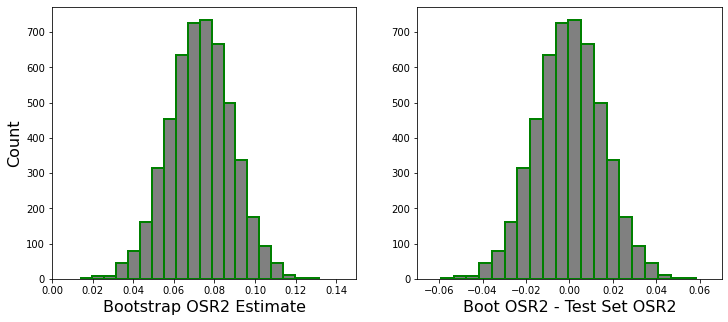

In [ ]:
#bootstrap plots
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap OSR2 Estimate', fontsize=16)
axs[1].set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(fun_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.0,0.15])
axs[1].hist(fun_output.iloc[:,0]-fun_test_OSR2, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.07,0.07])

In [ ]:
# The 95% confidence interval
CI_0 = np.quantile(fun_output.iloc[:,0]-fun_test_OSR2,np.array([0.025,0.975]))
left = fun_test_OSR2 - CI_0[1]
right = fun_test_OSR2 - CI_0[0]
print("The 95-percent confidence interval of the test set OSR2 for the linear regression fun model is: ",[left, right])

The 95-percent confidence interval of the test set OSR2 for the linear regression fun model is:  [0.04317136944899776, 0.10387740402975806]


## Fun (LDA - Train Model + Bootstrap Accuracy)

In [ ]:
# Run LDA on Sincerity trait.
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# redefine y_train/y_test type to int
y_train = fun_y_train.astype(int)
y_test = fun_y_test.astype(int)

# train
fun_lda = LinearDiscriminantAnalysis()
fun_lda.fit(fun_X_train, y_train)

#fun_X_test.drop(columns=['const'])

LinearDiscriminantAnalysis()

In [ ]:
# compute ambition accuracy of LDA
from sklearn.metrics import accuracy_score
y_pred = fun_lda.predict(sm.add_constant(fun_X_test))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)
fun_lda_acc = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", fun_lda_acc)

Confusion Matrix : 
 [[  0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   1   1   1   4   4   5   4   0   2   0]
 [  1   0   4   3   0   5  16  10   3   0   1   0]
 [  2   0   0   1   0  10  19  20   5   0   0   0]
 [  0   1   5   1   2  18  48  29  15   0   3   0]
 [  1   0   5   5   2  37  60  71  48   2   1   0]
 [  1   0   1   0   2  38 115  99  56   1   6   0]
 [  1   4   0   3   5  43  92 140  79   3  13   0]
 [  1   0   1   1   1  19  85 109  79   0  13   1]
 [  0   0   1   0   0   7  23  51  31   2   8   0]
 [  0   0   0   0   0   2  11  37  22   1  14   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]

Test Set Accuracy: 0.23176470588235293


In [ ]:
# Fit new linear model

# We must add an intercept as the standard model doesn't automatically fit one
fun_X_test = sm.add_constant(fun_X_test)

In [ ]:
# compute sincerity accuracy of LDA
from sklearn.metrics import accuracy_score
y_pred = fun_lda.predict(fun_X_test)
fun_lda_acc = accuracy_score(y_test, y_pred)
fun_lda_acc

0.23176470588235293

In [ ]:
def fun_accuracy(y_pred, y_test, y_train):
  return accuracy_score(y_test, y_pred)

In [ ]:
fun_lda_output = bootstrap_validation(fun_X_test,y_test,y_train,fun_lda,
                                 metrics_list=[fun_accuracy],
                                 sample = 5000)

(5000, 1)


(-0.05, 0.05)

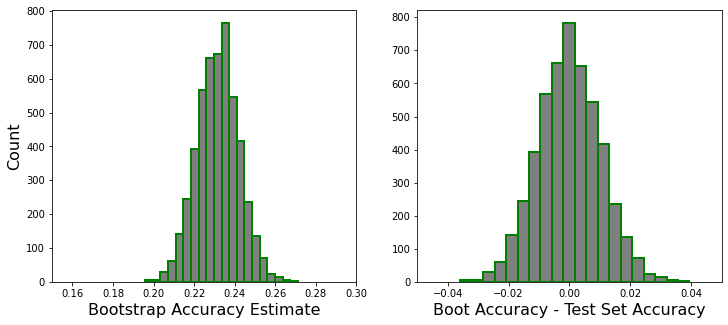

In [ ]:
#bootstrap plots
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boot Accuracy - Test Set Accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(fun_lda_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.15,0.3])
axs[1].hist(fun_lda_output.iloc[:,0]-fun_lda_acc, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-.05,.05])

In [ ]:
# Mean of bootstrapped estimate
print("Bootsrapped Mean of LDA estimates: %s" % np.mean(fun_lda_output)[0])

Bootsrapped Mean of LDA estimates: 0.23172341176471756


In [ ]:
# The 95% confidence interval
CI_0 = np.quantile(fun_lda_output.iloc[:,0]-fun_lda_acc,np.array([0.025,0.975]))
left = fun_lda_acc - CI_0[1]
right = fun_lda_acc - CI_0[0]
print("The 95-percent confidence interval of the test set accuuracy for the LDA attractiveness model is: ",[left, right])

The 95-percent confidence interval of the test set accuuracy for the LDA attractiveness model is:  [0.2117647058823529, 0.2517647058823529]


## Fun (Rescaled OSR^2 & Baseline Comparisons)

In [ ]:
base_fun = 1 - (np.sum((fun_y_test - fun_y_train.value_counts().index[0])**2)/np.sum((fun_y_test - np.mean(fun_y_train))**2))
rm1_lr_fun = rescaled_OSR2_1(fun_lr, fun_y_train, fun_test, 'fun_o', 'lr')
rm2_lr_fun = rescaled_OSR2_2(fun_lr, fun_y_train, fun_test, 'fun_o', 'lr')
rm1_lda_fun = rescaled_OSR2_1(fun_lda, fun_y_train, fun_test, 'fun_o', 'lda')
rm2_lda_fun = rescaled_OSR2_2(fun_lda, fun_y_train, fun_test, 'fun_o', 'lda')

print('Models for FUN:')
print('No Rescale Bootstrapped Mean, Linear Regression OSR2 for FUN:', np.mean(fun_output)[0])
print('No Rescale Bootstrapped Mean, LDA Accuracy for FUN:', np.mean(fun_lda_output)[0])
print()
print('Rescaling Linear Regression Model before OSR2 Calculation:')
print('Rescale Method 1, Linear Regression OSR2 for FUN:', rm1_lr_fun)
print('Rescale Method 2, Linear Regression OSR2 for FUN:', rm2_lr_fun)
print()
print('BASELINE:')
print('Baseline OSR2:', base_fun)
print()
print('FUN MODEL COMPARISONS:')
print('OSR2 difference between LR model and baseline:', np.amax(np.array([rm1_lr_fun, rm2_lr_fun, rm1_lda_fun, rm2_lda_fun, np.mean(fun_output)[0]])) - base_fun)
print('Accuracy difference for LDA and baseline:', np.mean(fun_lda_output)[0] - fun_y_train.value_counts().values[0]/np.sum(fun_y_train.value_counts()))

Models for FUN:
No Rescale Bootstrapped Mean, Linear Regression OSR2 for FUN: 0.07314556109946475
No Rescale Bootstrapped Mean, LDA Accuracy for FUN: 0.23172341176471756

Rescaling Linear Regression Model before OSR2 Calculation:
Rescale Method 1, Linear Regression OSR2 for FUN: -5.971486763801201
Rescale Method 2, Linear Regression OSR2 for FUN: -4.369468773069706

BASELINE:
Baseline OSR2: -0.07529598291473372

FUN MODEL COMPARISONS:
OSR2 difference between LR model and baseline: 0.14844154401419846
Accuracy difference for LDA and baseline: 0.02622179364174021


## Ambition (Linear Regression + LDA)

Make linear model for this trait, perform feature selection.
Bootstrap your model and report the mean and 95% CI for OSR^2.

Run LDA on this trait. Bootstrap this model and report the mean and 95% CI for accuracy. Calculate OSR^2 as well.

Calculate rescaled OSR^2 using the two methods above.

## Ambition (Linear Regression - Feature Selection)

In [ ]:
# Fit linear model for amb_o
X_train = amb_X_train.copy()
y_train = amb_y_train.copy()
X_test = amb_X_test.copy()
y_test = amb_y_test.copy()
# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

# Fit the data to the model
amb_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(amb_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  amb_o   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     10.49
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           6.84e-88
Time:                        23:12:52   Log-Likelihood:                -12686.
No. Observations:                6475   AIC:                         2.549e+04
Df Residuals:                    6416   BIC:                         2.589e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7514      0.02

In [ ]:
#Check VIF values
amb_cols = X_train.drop(columns = ['const']).columns.to_list()

VIF(X_train, amb_cols).sort_values(ascending=False)


(1_1-2_1_o)_att      89.299014
attr1_1              77.414182
(1_1-2_1_o)_sinc     29.739853
sinc1_1              29.403058
intel1_1             28.937455
(1_1-2_1_o)_intel    27.027151
(1_1-2_1_o)_fun      24.053179
(1_1-2_1_o)_shar     23.444541
shar1_1              23.431900
fun1_1               20.464547
amb1_1               19.940871
(1_1-2_1_o)_amb      19.726604
museums_diff          4.541827
art_diff              4.204010
(3_1-pf_o)_att        3.440607
gender                2.985648
concerts_diff         2.344634
theater_diff          2.296274
income_diff           2.094196
age_diff              2.086902
age_o                 2.071458
shopping_diff         2.059868
sports_diff           2.049688
income                2.032331
(3_1-pf_o)_amb        1.922232
music_diff            1.911222
world_rank_o          1.882794
(3_1-pf_o)_sinc       1.872812
(3_1-pf_o)_intel      1.851110
tv_diff               1.822716
worldrank_diff        1.791883
tvsport_diff          1.761662
tuition_

In [ ]:
#drop '(1_1-2_1_o)_att' since it has the highest VIF value
X_train = X_train.drop(columns=['(1_1-2_1_o)_att'])

amb_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(amb_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  amb_o   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     10.65
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.50e-88
Time:                        23:12:55   Log-Likelihood:                -12687.
No. Observations:                6475   AIC:                         2.549e+04
Df Residuals:                    6417   BIC:                         2.588e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7514      0.02

In [ ]:
#Check VIF values again
amb_cols = X_train.drop(columns = ['const']).columns.to_list()

VIF(X_train, amb_cols).sort_values(ascending=False)


attr1_1              35.383296
intel1_1             14.826750
sinc1_1              14.752754
shar1_1              12.195339
fun1_1               10.673675
amb1_1                9.938157
museums_diff          4.541786
art_diff              4.197629
(3_1-pf_o)_att        3.420827
gender                2.951148
(1_1-2_1_o)_sinc      2.812828
(1_1-2_1_o)_intel     2.778155
(1_1-2_1_o)_shar      2.647926
concerts_diff         2.344020
(1_1-2_1_o)_fun       2.332530
theater_diff          2.296274
(1_1-2_1_o)_amb       2.098858
income_diff           2.089281
age_diff              2.086770
age_o                 2.068579
shopping_diff         2.059851
sports_diff           2.048906
income                2.028366
(3_1-pf_o)_amb        1.916104
music_diff            1.910314
(3_1-pf_o)_sinc       1.872739
world_rank_o          1.869574
(3_1-pf_o)_intel      1.850387
tv_diff               1.821495
worldrank_diff        1.791383
tvsport_diff          1.758025
tuition_o             1.751415
masters_

In [ ]:
#drop 'attr1_1' since it has the highest VIF value now
X_train = X_train.drop(columns=['attr1_1'])

amb_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(amb_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  amb_o   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     10.83
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.58e-88
Time:                        23:12:57   Log-Likelihood:                -12687.
No. Observations:                6475   AIC:                         2.549e+04
Df Residuals:                    6418   BIC:                         2.587e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7514      0.02

In [ ]:
#Check VIF values again
amb_cols = X_train.drop(columns = ['const']).columns.to_list()

VIF(X_train, amb_cols).sort_values(ascending=False)

museums_diff         4.541766
art_diff             4.197169
(3_1-pf_o)_att       3.420823
gender               2.930325
intel1_1             2.889620
(1_1-2_1_o)_sinc     2.811507
(1_1-2_1_o)_intel    2.777644
(1_1-2_1_o)_shar     2.645535
sinc1_1              2.617768
shar1_1              2.426319
amb1_1               2.351199
concerts_diff        2.337299
(1_1-2_1_o)_fun      2.332280
theater_diff         2.292683
fun1_1               2.261990
(1_1-2_1_o)_amb      2.098396
income_diff          2.088078
age_diff             2.086715
age_o                2.067219
shopping_diff        2.054380
sports_diff          2.046133
income               2.028244
(3_1-pf_o)_amb       1.915229
music_diff           1.905844
(3_1-pf_o)_sinc      1.872735
world_rank_o         1.869021
(3_1-pf_o)_intel     1.849470
tv_diff              1.821491
worldrank_diff       1.791270
tuition_o            1.751295
tvsport_diff         1.750397
masters_o            1.741015
movies_diff          1.735546
mn_sat_o  

In [ ]:
#drop 'museums_diff' since it has the highest VIF value now
X_train = X_train.drop(columns=['museums_diff'])

amb_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(amb_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  amb_o   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     10.94
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.12e-88
Time:                        23:12:59   Log-Likelihood:                -12689.
No. Observations:                6475   AIC:                         2.549e+04
Df Residuals:                    6419   BIC:                         2.587e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7514      0.02

In [ ]:
#Check VIF values again
amb_cols = X_train.drop(columns = ['const']).columns.to_list()

VIF(X_train, amb_cols).sort_values(ascending=False)

(3_1-pf_o)_att       3.420383
gender               2.915146
intel1_1             2.865390
(1_1-2_1_o)_sinc     2.810981
(1_1-2_1_o)_intel    2.768172
(1_1-2_1_o)_shar     2.645514
sinc1_1              2.615632
shar1_1              2.426298
amb1_1               2.348208
concerts_diff        2.337292
(1_1-2_1_o)_fun      2.329898
fun1_1               2.258588
theater_diff         2.224635
(1_1-2_1_o)_amb      2.088006
age_diff             2.086451
income_diff          2.078722
age_o                2.064890
sports_diff          2.045913
shopping_diff        2.033868
income               2.027454
(3_1-pf_o)_amb       1.913267
music_diff           1.905428
(3_1-pf_o)_sinc      1.871904
world_rank_o         1.868964
(3_1-pf_o)_intel     1.843109
tv_diff              1.818018
worldrank_diff       1.786211
art_diff             1.775966
tuition_o            1.750688
tvsport_diff         1.741261
masters_o            1.740990
movies_diff          1.732914
mn_sat_o             1.731956
masters_m 

In [ ]:
#drop '(3_1-pf_o)_att' since it has the highest VIF value now
X_train = X_train.drop(columns=['(3_1-pf_o)_att'])

amb_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(amb_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  amb_o   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     10.98
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.96e-87
Time:                        23:13:01   Log-Likelihood:                -12693.
No. Observations:                6475   AIC:                         2.550e+04
Df Residuals:                    6420   BIC:                         2.587e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7514      0.02

In [ ]:
#Check VIF values again
amb_cols = X_train.drop(columns = ['const']).columns.to_list()

VIF(X_train, amb_cols).sort_values(ascending=False)

intel1_1             2.863669
gender               2.767929
(1_1-2_1_o)_intel    2.763741
(1_1-2_1_o)_sinc     2.689244
sinc1_1              2.574314
(1_1-2_1_o)_shar     2.330162
concerts_diff        2.321894
(1_1-2_1_o)_fun      2.304496
shar1_1              2.303232
fun1_1               2.253657
amb1_1               2.250375
theater_diff         2.223974
age_diff             2.084868
income_diff          2.072401
age_o                2.064028
sports_diff          2.029620
income               2.021172
(1_1-2_1_o)_amb      2.016894
shopping_diff        2.006044
music_diff           1.901041
world_rank_o         1.867622
tv_diff              1.815838
worldrank_diff       1.785438
art_diff             1.775679
tuition_o            1.749917
tvsport_diff         1.741152
masters_o            1.737898
mn_sat_o             1.731888
movies_diff          1.731304
masters_m            1.663612
dining_diff          1.476581
gaming_diff          1.465318
(3_1-pf_o)_amb       1.412582
hiking_dif

All VIF values look small, let remove the large p-value next

In [ ]:
#from our newest model, let's remove 'exercise_diff' which has the largest p-value
X_train = X_train.drop(columns=['exercise_diff'])

amb_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(amb_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  amb_o   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     11.19
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.18e-87
Time:                        23:13:03   Log-Likelihood:                -12693.
No. Observations:                6475   AIC:                         2.549e+04
Df Residuals:                    6421   BIC:                         2.586e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7514      0.02

In [ ]:
#from our newest model, let's remove 'tvsport_diff' which has the largest p-value
X_train = X_train.drop(columns=['tvsport_diff'])

amb_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(amb_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  amb_o   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     11.41
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.56e-88
Time:                        23:13:03   Log-Likelihood:                -12693.
No. Observations:                6475   AIC:                         2.549e+04
Df Residuals:                    6422   BIC:                         2.585e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7514      0.02

In [ ]:
#from our newest model, let's remove 'income' which has the largest p-value
X_train = X_train.drop(columns=['income'])

amb_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(amb_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  amb_o   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     11.63
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.06e-88
Time:                        23:13:03   Log-Likelihood:                -12693.
No. Observations:                6475   AIC:                         2.549e+04
Df Residuals:                    6423   BIC:                         2.584e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7514      0.02

In [ ]:
#from our newest model, let's remove 'worldrank_diff' which has the largest p-value
X_train = X_train.drop(columns=['worldrank_diff'])

amb_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(amb_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  amb_o   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     11.86
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.15e-89
Time:                        23:13:03   Log-Likelihood:                -12693.
No. Observations:                6475   AIC:                         2.549e+04
Df Residuals:                    6424   BIC:                         2.583e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7514      0.02

In [ ]:
#from our newest model, let's remove 'age_o' which has the largest p-value
X_train = X_train.drop(columns=['age_o'])

amb_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(amb_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  amb_o   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     12.10
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           9.39e-90
Time:                        23:13:03   Log-Likelihood:                -12694.
No. Observations:                6475   AIC:                         2.549e+04
Df Residuals:                    6425   BIC:                         2.583e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7514      0.02

I have removed some variables with super large p-values, and I will use the current model as my final linear model for amb_o attribute.

## Ambition (Linear Regression - Bootstrap OSR2)

In [ ]:
#define the current model as the final model "amb_lr"
amb_lr = amb_model

#remove the variables from test set
X_test = X_test.drop(columns = ['(1_1-2_1_o)_att', 'attr1_1', 'museums_diff', '(3_1-pf_o)_att', 'exercise_diff', 'tvsport_diff', 'income', 'worldrank_diff', 'age_o'])

In [ ]:
# compute out-of-sample R-squared using the test set
def amb_OSR2(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

In [ ]:
# Check OSR^2 with test set
amb_test_OSR2 = amb_OSR2(amb_lr.predict(sm.add_constant(X_test)), y_test, y_train)
amb_test_OSR2

0.05870217689690993

In [ ]:
amb_output = bootstrap_validation(sm.add_constant(X_test),y_test,y_train,amb_lr,
                                 metrics_list=[amb_OSR2],
                                 sample = 5000)

(5000, 1)


In [ ]:
# Mean of bootstrapped estimate
print('The bootstrapped mean of linear regression OSR2 is:', np.mean(amb_output)[0])

The bootstrapped mean of linear regression OSR2 is: 0.05848478492951455


(-0.05, 0.05)

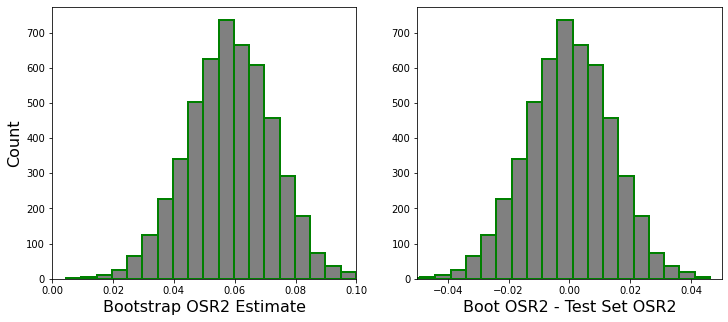

In [ ]:
#bootstrap plots
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap OSR2 Estimate', fontsize=16)
axs[1].set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(amb_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.0,0.1])
axs[1].hist(amb_output.iloc[:,0]-amb_test_OSR2, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.05,0.05])

In [ ]:
# The 95% confidence interval
CI_0 = np.quantile(amb_output.iloc[:,0]-amb_test_OSR2,np.array([0.025,0.975]))
left = amb_test_OSR2 - CI_0[1]
right = amb_test_OSR2 - CI_0[0]
print("The 95-percent confidence interval of the test set OSR2 for the linear regression ambition model is:",[left, right])

The 95-percent confidence interval of the test set OSR2 for the linear regression ambition model is: [0.03207518707393858, 0.0870139373173629]


## Ambition (LDA - Train Model + Bootstrap Accuracy)

Let's do LDA on amb_o next

In [ ]:
# Run LDA on ambition trait.
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# redefine y_train/y_test type to int
y_train = amb_y_train.astype(int)
y_test = amb_y_test.astype(int)

# train
amb_lda = LinearDiscriminantAnalysis()
amb_lda.fit(sm.add_constant(amb_X_train), y_train)

LinearDiscriminantAnalysis()

In [ ]:
# compute ambition accuracy of LDA
from sklearn.metrics import accuracy_score
y_pred = amb_lda.predict(sm.add_constant(amb_X_test))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)
amb_lda_acc = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", amb_lda_acc)

Confusion Matrix : 
 [[  0   0   0   0   0   0   1   0   0   0   0]
 [  0   3   0   0   0   2   2   2   1   0   0]
 [  0   3   2   0   0   3   2   5   4   0   0]
 [  0   3   0   1   0   7   6  18   4   1   1]
 [  0   0   1   1   0   9  15  28  20   0   1]
 [  1   1   2   2   0  45  51  89  34   3   5]
 [  0   0   0   3   0  48  67 127  63   3   8]
 [  0   1   1   1   0  42  56 140  78   7   4]
 [  0   0   7   2   0  22  44 110 108  13   7]
 [  1   0   0   1   0  13  28  72  52  13   8]
 [  0   0   2   0   0   3  17  20  36   3   9]]

Test Set Accuracy: 0.23965410747374924


Although the accuracy is not very high, we can see that the most predicted is very closed to the true values from the confusion matrix which is noticeable and good enought under our scenario.

In [ ]:
#define the accuracy function
def amb_accuracy(y_pred, y_test, y_train):
  return accuracy_score(y_test, y_pred)

In [ ]:
amb_lda_output = bootstrap_validation(sm.add_constant(amb_X_test),y_test,y_train,amb_lda,
                                 metrics_list=[amb_accuracy],
                                 sample = 5000)

(5000, 1)


(-0.05, 0.05)

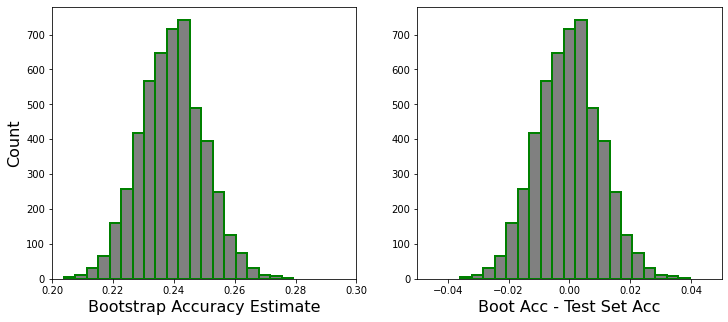

In [ ]:
#bootstrap accuracy plots for ambition
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boot Acc - Test Set Acc', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(amb_lda_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.2,0.3])
axs[1].hist(amb_lda_output.iloc[:,0]-amb_lda_acc, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.05,0.05])

In [ ]:
print('The bootstrapped mean of LDA accuracy is:', np.mean(amb_lda_output)[0])

The bootstrapped mean of LDA accuracy is: 0.2393724521309446


In [ ]:
# The 95% confidence interval
CI_0 = np.quantile(amb_lda_output.iloc[:,0]-amb_lda_acc,np.array([0.025,0.975]))
left =amb_lda_acc - CI_0[1]
right = amb_lda_acc - CI_0[0]
print("The 95-percent confidence interval of the test set accuuracy for the LDA ambition model is :",[left, right])

The 95-percent confidence interval of the test set accuuracy for the LDA ambition model is : [0.2192711550339716, 0.2600370599135269]


## Ambition (Rescaled OSR^2 & Baseline Comparisons)

In [ ]:
base_amb = 1 - (np.sum((amb_y_test - amb_y_train.value_counts().index[0])**2)/np.sum((amb_y_test - np.mean(amb_y_train))**2))
rm1_lr_amb = rescaled_OSR2_1(amb_lr, amb_y_train, amb_test.drop(columns = ['(1_1-2_1_o)_att', 'attr1_1', 'museums_diff', '(3_1-pf_o)_att', 'exercise_diff', 'tvsport_diff', 'income', 'worldrank_diff', 'age_o']), 'amb_o', 'lr')
rm2_lr_amb = rescaled_OSR2_2(amb_lr, amb_y_train, amb_test.drop(columns = ['(1_1-2_1_o)_att', 'attr1_1', 'museums_diff', '(3_1-pf_o)_att', 'exercise_diff', 'tvsport_diff', 'income', 'worldrank_diff', 'age_o']), 'amb_o', 'lr')
rm1_lda_amb = rescaled_OSR2_1(amb_lda, amb_y_train, amb_test, 'amb_o', 'lda')
rm2_lda_amb = rescaled_OSR2_1(amb_lda, amb_y_train, amb_test, 'amb_o', 'lda')

print('Models for AMBITION:')
print('No Rescale Bootstrapped Mean, Linear Regression OSR2 for AMBITION:', np.mean(amb_output)[0])
print('No Rescale Bootstrapped Mean, LDA Accuracy for AMBITION:', np.mean(amb_lda_output)[0])
print()
print('Rescaling Linear Regression Model before OSR2 Calculation:')
print('Rescale Method 1, Linear Regression AMBITION OSR2:', rm1_lr_amb)
print('Rescale Method 2, Linear Regression AMBITION OSR2:', rm2_lr_amb)
print()
print('BASELINE:')
print('Baseline OSR2:', base_amb)
print()
print('AMBITION MODEL COMPARISONS:')
print('OSR2 difference between LR model and baseline:', np.amax(np.array([rm1_lr_amb, rm2_lr_amb, rm1_lda_amb, rm2_lda_amb, np.mean(amb_output)[0]])) - base_amb)
print('Accuracy difference for LDA and baseline:', np.mean(amb_lda_output)[0] - amb_y_train.value_counts().values[0]/np.sum(amb_y_train.value_counts()))

Models for AMBITION:
No Rescale Bootstrapped Mean, Linear Regression OSR2 for AMBITION: 0.05848478492951455
No Rescale Bootstrapped Mean, LDA Accuracy for AMBITION: 0.2393724521309446

Rescaling Linear Regression Model before OSR2 Calculation:
Rescale Method 1, Linear Regression AMBITION OSR2: -6.86217208168576
Rescale Method 2, Linear Regression AMBITION OSR2: -5.426562239790915

BASELINE:
Baseline OSR2: -0.016633220338508004

AMBITION MODEL COMPARISONS:
OSR2 difference between LR model and baseline: 0.07511800526802255
Accuracy difference for LDA and baseline: 0.01342650618499866


## Shared Interests (Linear Regression + LDA)

Make linear model for this trait, perform feature selection.
Bootstrap your model and report the mean and 95% CI for OSR^2.

Run LDA on this trait. Bootstrap this model and report the mean and 95% CI for accuracy. Calculate OSR^2 as well.

Calculate rescaled OSR^2 using the two methods above.

## Shared Interests (Linear Regression - Feature Selection)

In [ ]:
# Fit linear model
X_train = sha_X_train.copy()
y_train = sha_y_train.copy()
X_test = sha_X_test.copy()
y_test = sha_y_test.copy()
# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

# Fit the data to the model
sha_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(amb_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  amb_o   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     12.10
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           9.39e-90
Time:                        23:13:56   Log-Likelihood:                -12694.
No. Observations:                6475   AIC:                         2.549e+04
Df Residuals:                    6425   BIC:                         2.583e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7514      0.02

In [ ]:
# Check VIF values
#Check VIF values
sha_cols = X_train.drop(columns = ['const']).columns.to_list()

VIF(X_train, sha_cols).sort_values(ascending=False)

(1_1-2_1_o)_att      115.180474
attr1_1               92.029895
(1_1-2_1_o)_sinc      38.050239
(1_1-2_1_o)_intel     34.868451
intel1_1              34.420952
sinc1_1               33.695288
(1_1-2_1_o)_fun       32.347815
(1_1-2_1_o)_shar      29.808634
shar1_1               28.235763
(1_1-2_1_o)_amb       25.543280
fun1_1                24.940522
amb1_1                23.562514
museums_diff           4.630002
art_diff               4.236244
(3_1-pf_o)_att         3.502786
gender                 3.044223
concerts_diff          2.371739
theater_diff           2.336949
sports_diff            2.112711
income_diff            2.109407
age_diff               2.079827
shopping_diff          2.057689
income                 2.038006
age_o                  2.031456
music_diff             1.943634
world_rank_o           1.926133
(3_1-pf_o)_amb         1.897611
(3_1-pf_o)_sinc        1.891250
(3_1-pf_o)_intel       1.854387
worldrank_diff         1.826370
tv_diff                1.787047
movies_d

In [ ]:
# Remove highest VIF column
X_train = X_train.drop(columns=['museums_diff'])

sha_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sha_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 shar_o   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     9.644
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.18e-77
Time:                        23:13:58   Log-Likelihood:                -13253.
No. Observations:                6196   AIC:                         2.662e+04
Df Residuals:                    6138   BIC:                         2.701e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4946      0.02

In [ ]:
# Check VIF values
sha_cols = X_train.drop(columns = ['const']).columns.to_list()

VIF(X_train, sha_cols).sort_values(ascending=False)

(1_1-2_1_o)_att      115.047567
attr1_1               91.937500
(1_1-2_1_o)_sinc      38.016977
(1_1-2_1_o)_intel     34.859497
intel1_1              34.420422
sinc1_1               33.675609
(1_1-2_1_o)_fun       32.287092
(1_1-2_1_o)_shar      29.772718
shar1_1               28.202526
(1_1-2_1_o)_amb       25.478789
fun1_1                24.891708
amb1_1                23.529462
(3_1-pf_o)_att         3.502111
gender                 3.023843
concerts_diff          2.371544
theater_diff           2.278620
sports_diff            2.112345
income_diff            2.103556
age_diff               2.079687
shopping_diff          2.039543
income                 2.037995
age_o                  2.029634
music_diff             1.942680
world_rank_o           1.925285
(3_1-pf_o)_amb         1.895421
(3_1-pf_o)_sinc        1.889477
(3_1-pf_o)_intel       1.846422
worldrank_diff         1.820399
art_diff               1.794882
tv_diff                1.785115
movies_diff            1.746261
tuition_

In [ ]:
# since VIF values are all small - lets remove high p-valued features
X_train = X_train.drop(columns=['order'])
sha_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sha_model.summary())

# Check VIF values
sha_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, sha_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 shar_o   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     9.817
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.84e-78
Time:                        23:14:00   Log-Likelihood:                -13253.
No. Observations:                6196   AIC:                         2.662e+04
Df Residuals:                    6139   BIC:                         2.700e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4946      0.02

(1_1-2_1_o)_att      115.030877
attr1_1               91.927998
(1_1-2_1_o)_sinc      38.010675
(1_1-2_1_o)_intel     34.851726
intel1_1              34.415375
sinc1_1               33.672288
(1_1-2_1_o)_fun       32.284058
(1_1-2_1_o)_shar      29.768464
shar1_1               28.197482
(1_1-2_1_o)_amb       25.477352
fun1_1                24.888474
amb1_1                23.529434
(3_1-pf_o)_att         3.501876
gender                 3.023573
concerts_diff          2.371519
theater_diff           2.278403
sports_diff            2.112061
income_diff            2.103539
age_diff               2.077707
shopping_diff          2.039532
income                 2.037977
age_o                  2.027158
music_diff             1.942641
world_rank_o           1.925238
(3_1-pf_o)_amb         1.895294
(3_1-pf_o)_sinc        1.889446
(3_1-pf_o)_intel       1.846393
worldrank_diff         1.820320
art_diff               1.794877
tv_diff                1.785088
movies_diff            1.745864
tuition_

In [ ]:
# since VIF values are still all small - lets continue to remove high p-valued features
X_train = X_train.drop(columns=['movies_diff'])
sha_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sha_model.summary())

# Check VIF values
sha_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, sha_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 shar_o   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     9.991
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.39e-78
Time:                        23:14:02   Log-Likelihood:                -13254.
No. Observations:                6196   AIC:                         2.662e+04
Df Residuals:                    6140   BIC:                         2.700e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4946      0.02

(1_1-2_1_o)_att      114.309405
attr1_1               91.184600
(1_1-2_1_o)_sinc      37.792660
(1_1-2_1_o)_intel     34.683958
intel1_1              34.251918
sinc1_1               33.453521
(1_1-2_1_o)_fun       32.105458
(1_1-2_1_o)_shar      29.558715
shar1_1               27.915818
(1_1-2_1_o)_amb       25.290043
fun1_1                24.710859
amb1_1                23.311674
(3_1-pf_o)_att         3.500870
gender                 3.004928
concerts_diff          2.332115
sports_diff            2.106498
income_diff            2.103538
age_diff               2.077406
shopping_diff          2.039450
income                 2.037587
theater_diff           2.035389
age_o                  2.027158
music_diff             1.926463
world_rank_o           1.925051
(3_1-pf_o)_amb         1.894760
(3_1-pf_o)_sinc        1.884888
(3_1-pf_o)_intel       1.829922
worldrank_diff         1.817786
art_diff               1.794678
tuition_o              1.733329
tvsport_diff           1.717514
mn_sat_o

In [ ]:
# since VIF values are still all small but R squared has not changed - lets continue to remove high p-valued features
X_train = X_train.drop(columns=['mn_sat_o'])
sha_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sha_model.summary())

# Check VIF values
sha_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, sha_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 shar_o   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     10.17
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           4.89e-79
Time:                        23:14:04   Log-Likelihood:                -13254.
No. Observations:                6196   AIC:                         2.662e+04
Df Residuals:                    6141   BIC:                         2.699e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4946      0.02

(1_1-2_1_o)_att      114.236827
attr1_1               91.158662
(1_1-2_1_o)_sinc      37.792062
(1_1-2_1_o)_intel     34.674905
intel1_1              34.250941
sinc1_1               33.452392
(1_1-2_1_o)_fun       32.085599
(1_1-2_1_o)_shar      29.543634
shar1_1               27.913550
(1_1-2_1_o)_amb       25.245655
fun1_1                24.703859
amb1_1                23.272212
(3_1-pf_o)_att         3.500442
gender                 3.000923
concerts_diff          2.330430
sports_diff            2.105143
income_diff            2.102935
age_diff               2.076074
shopping_diff          2.039137
income                 2.037534
theater_diff           2.031846
age_o                  2.024112
music_diff             1.925766
world_rank_o           1.924034
(3_1-pf_o)_amb         1.889576
(3_1-pf_o)_sinc        1.874687
(3_1-pf_o)_intel       1.829687
worldrank_diff         1.817768
art_diff               1.790826
tvsport_diff           1.714450
masters_o              1.684509
masters_

In [ ]:
# since VIF values are still all small but R squared has not changed - lets continue to remove high p-valued features
X_train = X_train.drop(columns=['art_diff'])
sha_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sha_model.summary())

# Check VIF values
sha_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, sha_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 shar_o   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     10.35
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.98e-79
Time:                        23:14:06   Log-Likelihood:                -13254.
No. Observations:                6196   AIC:                         2.662e+04
Df Residuals:                    6142   BIC:                         2.698e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4946      0.02

(1_1-2_1_o)_att      114.062888
attr1_1               91.139202
(1_1-2_1_o)_sinc      37.701819
(1_1-2_1_o)_intel     34.636300
intel1_1              34.250679
sinc1_1               33.416081
(1_1-2_1_o)_fun       32.066115
(1_1-2_1_o)_shar      29.502100
shar1_1               27.911123
(1_1-2_1_o)_amb       25.218771
fun1_1                24.703804
amb1_1                23.259564
(3_1-pf_o)_att         3.499986
gender                 2.995817
concerts_diff          2.297915
sports_diff            2.104975
income_diff            2.102297
age_diff               2.075291
shopping_diff          2.037297
income                 2.035914
age_o                  2.023965
world_rank_o           1.924006
music_diff             1.920908
(3_1-pf_o)_amb         1.889044
(3_1-pf_o)_sinc        1.872375
(3_1-pf_o)_intel       1.823621
worldrank_diff         1.813184
theater_diff           1.796733
tvsport_diff           1.713717
masters_o              1.681369
masters_m              1.616227
tv_diff 

In [ ]:
# since VIF values are still all small but R squared has not changed - lets continue to remove high p-valued features
X_train = X_train.drop(columns=['tvsport_diff'])
sha_model = sm.OLS(y_train, X_train).fit() #ordinary least square
print(sha_model.summary())

# Check VIF values
sha_cols = X_train.drop(columns = ['const']).columns.to_list()
VIF(X_train, sha_cols).sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:                 shar_o   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     10.55
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           7.21e-80
Time:                        23:14:08   Log-Likelihood:                -13254.
No. Observations:                6196   AIC:                         2.661e+04
Df Residuals:                    6143   BIC:                         2.697e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4946      0.02

(1_1-2_1_o)_att      113.915593
attr1_1               90.723704
(1_1-2_1_o)_sinc      37.562837
(1_1-2_1_o)_intel     34.603977
intel1_1              34.090512
sinc1_1               33.168993
(1_1-2_1_o)_fun       32.064291
(1_1-2_1_o)_shar      29.490446
shar1_1               27.826197
(1_1-2_1_o)_amb       25.174210
fun1_1                24.650466
amb1_1                23.151774
(3_1-pf_o)_att         3.499800
gender                 2.993534
concerts_diff          2.293350
income_diff            2.102286
age_diff               2.074991
income                 2.035903
shopping_diff          2.035515
age_o                  2.023836
world_rank_o           1.923843
music_diff             1.918773
(3_1-pf_o)_amb         1.888840
(3_1-pf_o)_sinc        1.871227
(3_1-pf_o)_intel       1.823441
worldrank_diff         1.813159
theater_diff           1.796729
sports_diff            1.724349
masters_o              1.677123
masters_m              1.615070
(3_1-pf_o)_fun         1.550664
tv_diff 

In [ ]:
# Since R squared and Adj R squared still has not changed/improved, 
# and since VIF values are all small and p-values are also all smaller,
# We are satisfied with this model for shared interests

## Shared Interests (Linear Regression - Bootstrap OSR2)

In [ ]:
#define the current model as the final model "sha_lr"
sha_lr = sha_model

#remove the variables from test set
X_test = X_test.drop(columns = ['museums_diff','order','movies_diff', 'mn_sat_o', 'art_diff', 'tvsport_diff'])

In [ ]:
# Check OSR^2 with test set
sha_test_OSR2 = OSR2(sha_lr.predict(sm.add_constant(X_test)), y_test, y_train)
sha_test_OSR2

0.09273767401285915

In [ ]:
# Bootstrap linear regression model
sha_output = bootstrap_validation(sm.add_constant(X_test),y_test,y_train,sha_lr,
                                 metrics_list=[OSR2],
                                 sample = 5000)

(5000, 1)


(array([  5.,   9.,  25.,  49.,  92., 189., 315., 444., 604., 744., 701.,
        633., 492., 332., 204., 104.,  41.,  11.,   4.,   2.]),
 array([-0.0500772 , -0.04509013, -0.04010306, -0.03511599, -0.03012892,
        -0.02514185, -0.02015478, -0.01516771, -0.01018064, -0.00519357,
        -0.0002065 ,  0.00478057,  0.00976764,  0.01475471,  0.01974178,
         0.02472885,  0.02971592,  0.034703  ,  0.03969007,  0.04467714,
         0.04966421]),
 <a list of 20 Patch objects>)

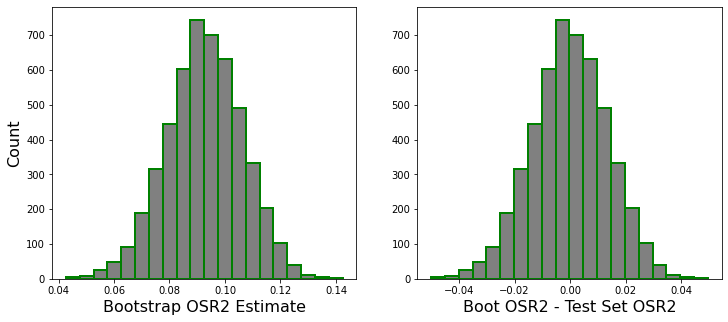

In [ ]:
#bootstrap plots
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap OSR2 Estimate', fontsize=16)
axs[1].set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(sha_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(sha_output.iloc[:,0]-sha_test_OSR2, bins=20,edgecolor='green', linewidth=2,color = "grey")

In [ ]:
# Mean of bootstrapped estimate
print("Mean of Linear Regression estimates: %s" % np.mean(sha_output)[0])
# The 95% confidence interval
CI_0 = np.quantile(sha_output.iloc[:,0]-sha_test_OSR2,np.array([0.025,0.975]))
left = sha_test_OSR2 - CI_0[1]
right = sha_test_OSR2 - CI_0[0]
print("The 95-percent confidence interval of the test set OSR2 for the linear regression shared interests model is",[left, right])

Mean of Linear Regression estimates: 0.09264698060821143
The 95-percent confidence interval of the test set OSR2 for the linear regression shared interests model is [0.06655472412329201, 0.12026468300504232]


## Shared Interests (LDA - Train Model + Bootstrap Accuracy)

In [ ]:
# redefine y_train/y_test type to int
y_train = sha_y_train.astype(int)
y_test = sha_y_test.astype(int)

# train
sha_lda = LinearDiscriminantAnalysis()
sha_lda.fit(sm.add_constant(sha_X_train), y_train)

LinearDiscriminantAnalysis()

In [ ]:
# compute ambition accuracy of LDA
from sklearn.metrics import accuracy_score
y_pred = sha_lda.predict(sm.add_constant(sha_X_test))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)
sha_lda_test_acc = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", sha_lda_test_acc)

Confusion Matrix : 
 [[  2   1   0   0   0   5   1   3   1   0   0]
 [  1  10   3   0   1  21  12   6   0   0   1]
 [  7   1  12   1   4  55  22   8   4   2   0]
 [  2   2  11   0   4  62  24  11   9   2   1]
 [  0   1   3   4   9  78  40  23   1   0   2]
 [  5   5   9   6  12 155  71  28   6   1   5]
 [  1   2   2   2   1 109  77  33  14   1  14]
 [  1   2   6   1  10  98  87  37  14   1  17]
 [  3   2   4   1   1  53  39  20  12   1   9]
 [  1   0   1   0   2  17   9   9   9   2   6]
 [  0   0   1   0   0   8   7   6   8   0  12]]

Test Set Accuracy: 0.2117495158166559


In [ ]:
sha_lda_output = bootstrap_validation(sm.add_constant(sha_X_test),y_test,y_train,sha_lda,
                                 metrics_list=[acc],
                                 sample = 5000)

(5000, 1)


(array([  4.,   6.,  20.,  76., 111., 189., 348., 538., 645., 647., 735.,
        616., 475., 285., 161.,  68.,  48.,  16.,   8.,   4.]),
 array([-0.03679793, -0.03305358, -0.02930923, -0.02556488, -0.02182053,
        -0.01807618, -0.01433183, -0.01058748, -0.00684312, -0.00309877,
         0.00064558,  0.00438993,  0.00813428,  0.01187863,  0.01562298,
         0.01936733,  0.02311168,  0.02685604,  0.03060039,  0.03434474,
         0.03808909]),
 <a list of 20 Patch objects>)

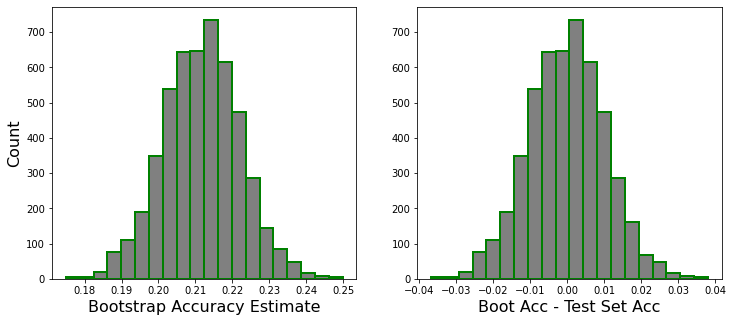

In [ ]:
#bootstrap accuracy plots for sincerity
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boot Acc - Test Set Acc', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(sha_lda_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(sha_lda_output.iloc[:,0]-sha_lda_test_acc, bins=20,edgecolor='green', linewidth=2,color = "grey")

In [ ]:
# Mean of bootstrapped estimate
print("Bootstrapped Mean of LDA Accuracy estimates: %s" % np.mean(sha_lda_output)[0])
# The 95% confidence interval
CI_0 = np.quantile(sha_lda_output.iloc[:,0]-sha_lda_test_acc,np.array([0.025,0.975]))
left = sha_lda_test_acc - CI_0[1]
right = sha_lda_test_acc - CI_0[0]
print("The 95-percent confidence interval of the test set accuuracy for the LDA shared interests model is: ",[left, right])

Bootstrapped Mean of LDA Accuracy estimates: 0.21168353776630083
The 95-percent confidence interval of the test set accuuracy for the LDA shared interests model is:  [0.19173660426081343, 0.23240800516462234]


## Shared Interests

In [ ]:
base_sha = 1 - (np.sum((sha_y_test - sha_y_train.value_counts().index[0])**2)/np.sum((sha_y_test - np.mean(sha_y_train))**2))
rm1_lr_sha = rescaled_OSR2_1(sha_lr, sha_y_train, sha_test_2.drop(columns= ['museums_diff','order','movies_diff', 'mn_sat_o', 'art_diff', 'tvsport_diff']), 'shar_o', 'lr')
rm2_lr_sha = rescaled_OSR2_2(sha_lr, sha_y_train, sha_test_2.drop(columns= ['museums_diff','order','movies_diff', 'mn_sat_o', 'art_diff', 'tvsport_diff']), 'shar_o', 'lr')
rm1_lda_sha = rescaled_OSR2_1(sha_lda, sha_y_train, sha_test, 'shar_o', 'lda')
rm2_lda_sha = rescaled_OSR2_1(sha_lda, sha_y_train, sha_test, 'shar_o', 'lda')


print('Models for SHARED INTERESTS:')
print('No Rescale Bootstrap, Linear Regression OSR2 for SHARED INTERESTS:', np.mean(sha_output)[0])
print('No Rescale Bootstrap, LDA Accuracy for SHARED INTERESTS:', np.mean(sha_lda_output)[0])
print()
print('Rescaling Linear Regression Model before OSR2 Calculation:')
print('Rescale Method 1, Linear Regression OSR2 for SHARED INTERESTS:', rm1_lr_sha)
print('Rescale Method 2, Linear Regression OSR2 for SHARED INTERESTS:', rm2_lr_sha)
print()
print('BASELINE:')
print('Baseline OSR2:', base_sha)
print()
print('SHARED INTERESTS MODEL COMPARISONS:')
print('OSR2 difference between LR model and baseline:', np.amax(np.array([rm1_lr_sha, rm2_lr_sha, rm1_lda_sha, rm2_lda_sha, np.mean(sha_output)[0]])) - base_sha)
print('Accuracy difference for LDA and baseline:', np.mean(sha_lda_output)[0] - sha_y_train.value_counts().values[0]/np.sum(sha_y_train.value_counts()))

Models for SHARED INTERESTS:
No Rescale Bootstrap, Linear Regression OSR2 for SHARED INTERESTS: 0.09264698060821143
No Rescale Bootstrap, LDA Accuracy for SHARED INTERESTS: 0.21168353776630083

Rescaling Linear Regression Model before OSR2 Calculation:
Rescale Method 1, Linear Regression OSR2 for SHARED INTERESTS: -3.373976565540401
Rescale Method 2, Linear Regression OSR2 for SHARED INTERESTS: -1.4849082546637846

BASELINE:
Baseline OSR2: -0.03262780751053174

SHARED INTERESTS MODEL COMPARISONS:
OSR2 difference between LR model and baseline: 0.12527478811874315
Accuracy difference for LDA and baseline: 0.011877211103938023
